<a href="https://colab.research.google.com/github/nikhils10/Time-Series-Forecasting-Apple-Stock-Price-Using-SARIMA-Prophet/blob/master/Time_Series_Analysis_%26_Forecasting_of_Apple_Stock_Price_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing and installing libraries


In [1]:
##Installing
# %%capture
!pip install fbprophet
!pip install -U statsmodels
!pip install colorama

^C



[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


^C


In [2]:
##Importing Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose as sd
from scipy import stats 
from statsmodels.graphics.gofplots import qqplot as qq
from scipy.stats import kurtosis
import scipy
from statsmodels.tsa.stattools import adfuller
from pylab import rcParams
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pandas.core.window.rolling import Rolling
from sklearn.model_selection import train_test_split as split
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm
import warnings
import itertools
warnings.filterwarnings("ignore")
from statsmodels.stats.diagnostic import acorr_ljungbox
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error, mean_squared_log_error
from sklearn.model_selection import KFold, ShuffleSplit, StratifiedKFold, StratifiedShuffleSplit, TimeSeriesSplit
# from fbprophet import Prophet
from IPython import display
from matplotlib import pyplot
import os
import re
from colorama import Fore, Back, Style
import seaborn as sns
# import plotly.express as px
import warnings
from matplotlib.patches import Patch

In [3]:
##Matplotlib Parameters
import matplotlib.ticker as ticker
rcParams['axes.labelsize'] = 12
rcParams['xtick.labelsize'] = 12
rcParams['ytick.labelsize'] = 12
plt.style.context('fivethirtyeight')

# Loading Data 
From CSV File(Source: Yahoo Finance)

In [4]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [5]:
data = pd.read_csv('AAPL.csv')

In [6]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
1,2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2,2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
3,2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
4,2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100


**Data Describtion :-**

**Date**  : Date of trading

**Open**  : Price at which security first trades

**High**  : Highest Price of the trading day

**Low**   : Lowest Price of the trading day

**Close** : Last Price the stock traded during the trading day

**Adj Close** : Price that is adjusts Coroporate Actions on Closing Price

**Volume** : Number of Shares that changed hands during the trading day

In [7]:
##Summary Statistics
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2.011000e+03
mean,126.707469,127.827594,125.580258,126.741235,119.505548,5.949670e+07
std,50.483753,50.926301,50.124940,50.578369,52.438444,4.683856e+07
min,55.424286,57.085712,55.014286,55.790001,48.921928,1.136200e+07
25%,85.882858,86.717858,85.056427,86.202145,75.056679,2.758565e+07
50%,113.050003,114.190002,111.870003,113.050003,105.222908,4.346900e+07
75%,165.190002,167.409996,163.424995,165.245002,160.047111,7.471030e+07
max,291.119995,293.970001,288.119995,291.519989,289.522614,3.765300e+08


In [8]:
##Exploring Data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2011 entries, 0 to 2010
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2011 non-null   object 
 1   Open       2011 non-null   float64
 2   High       2011 non-null   float64
 3   Low        2011 non-null   float64
 4   Close      2011 non-null   float64
 5   Adj Close  2011 non-null   float64
 6   Volume     2011 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 110.1+ KB


# Data Preprocessing

In [9]:
##Dealing with Data Types

In [10]:
##Converting Date to DateTime Object
data['Date']

0       2012-01-03
1       2012-01-04
2       2012-01-05
3       2012-01-06
4       2012-01-09
           ...    
2006    2019-12-23
2007    2019-12-24
2008    2019-12-26
2009    2019-12-27
2010    2019-12-30
Name: Date, Length: 2011, dtype: object

In [11]:
data['Date'] = pd.to_datetime(data['Date'],format='%Y-%m-%d')

In [12]:
data.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [13]:
##Making Date as Index 
data.set_index('Date',inplace=True)

In [14]:
data['Date'] = data.index

In [15]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,Date
Date,,,,,,,
2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200,2012-01-03
2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500,2012-01-04
2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400,2012-01-05
2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200,2012-01-06
2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100,2012-01-09


In [16]:
##Checking Null Values
data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Date         0
dtype: int64

In [17]:
##Visualizing 

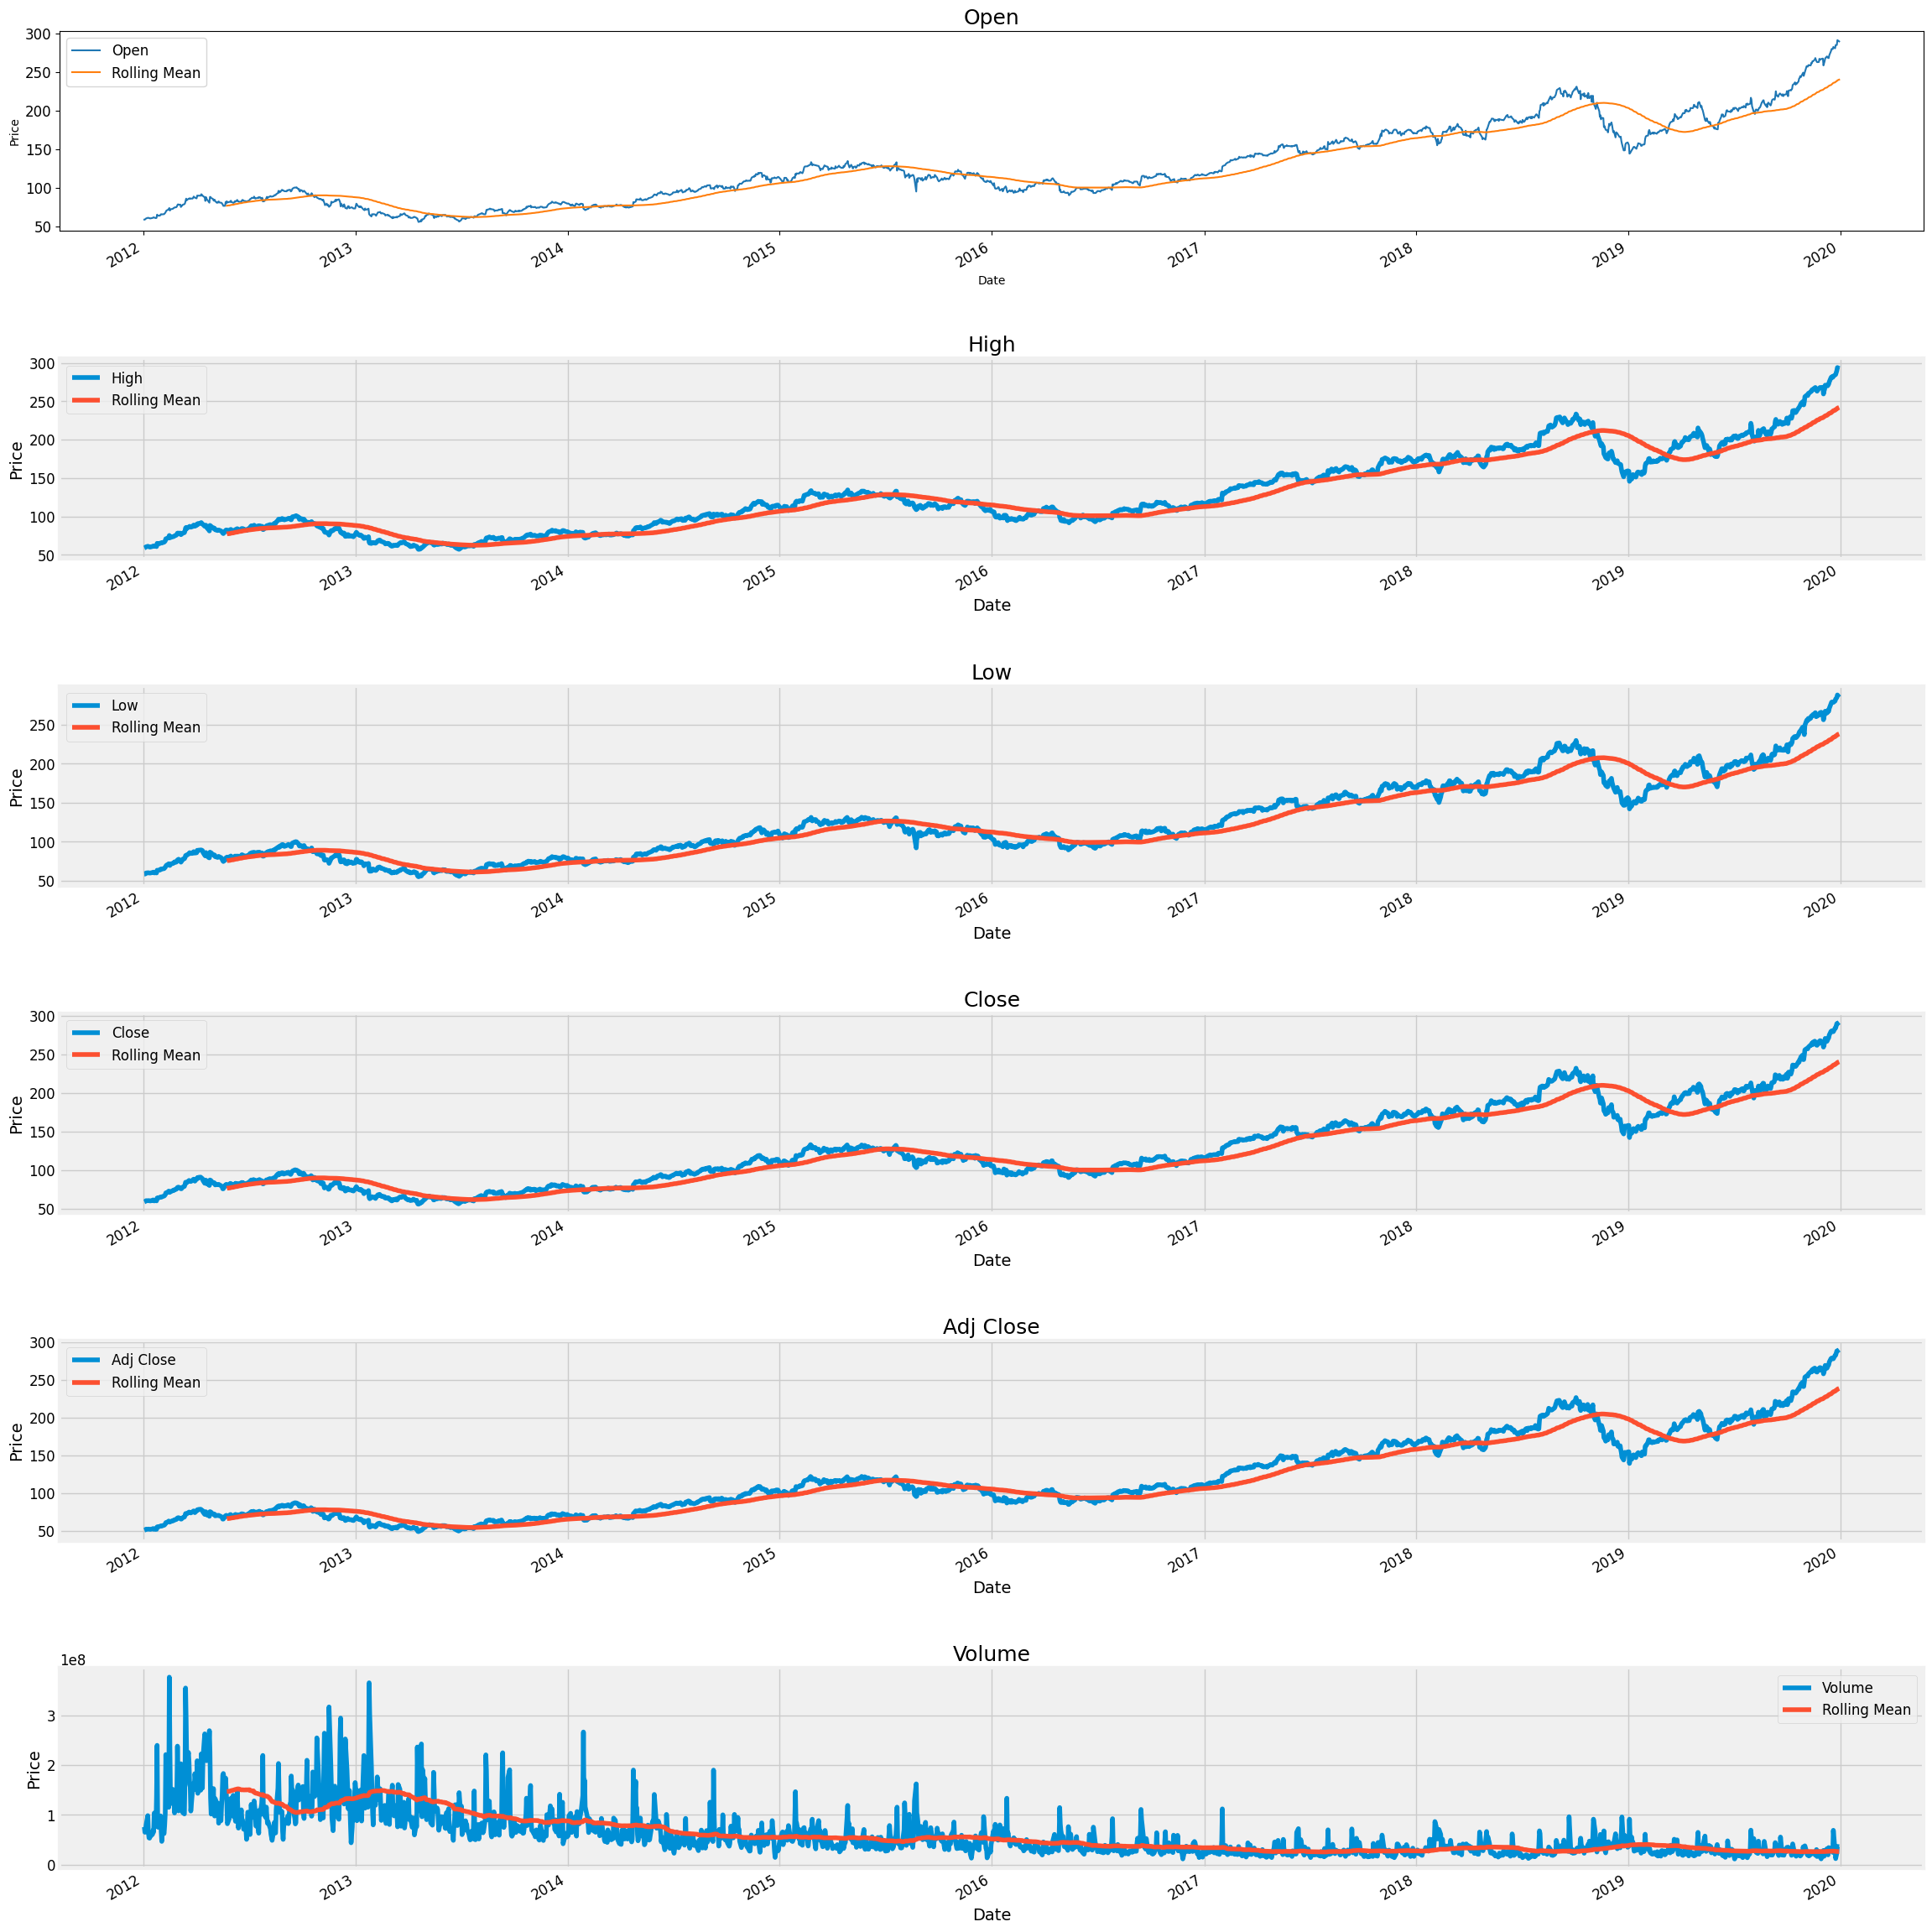

In [18]:
col_names = data.columns

fig = plt.figure(figsize=(24, 24))
for i in range(6):
  ax = fig.add_subplot(6,1,i+1)
  ax.plot(data.iloc[:,i],label=col_names[i])
  data.iloc[:,i].rolling(100).mean().plot(label='Rolling Mean')
  ax.set_title(col_names[i],fontsize=18)
  ax.set_xlabel('Date')
  ax.set_ylabel('Price')
  ax.patch.set_edgecolor('black')  
  plt.style.context('fivethirtyeight')
  plt.legend(prop={'size': 12})
  plt.style.use('fivethirtyeight')

fig.tight_layout(pad=3.0)

plt.show()

# **Feature Selection**
We can eliminate features like Open,Low, High Close automatically as they are high multicollinear with Adj Close .

We consider Adj Close as our target variables as it accounts for all corporate decisions like stock split and dividents.

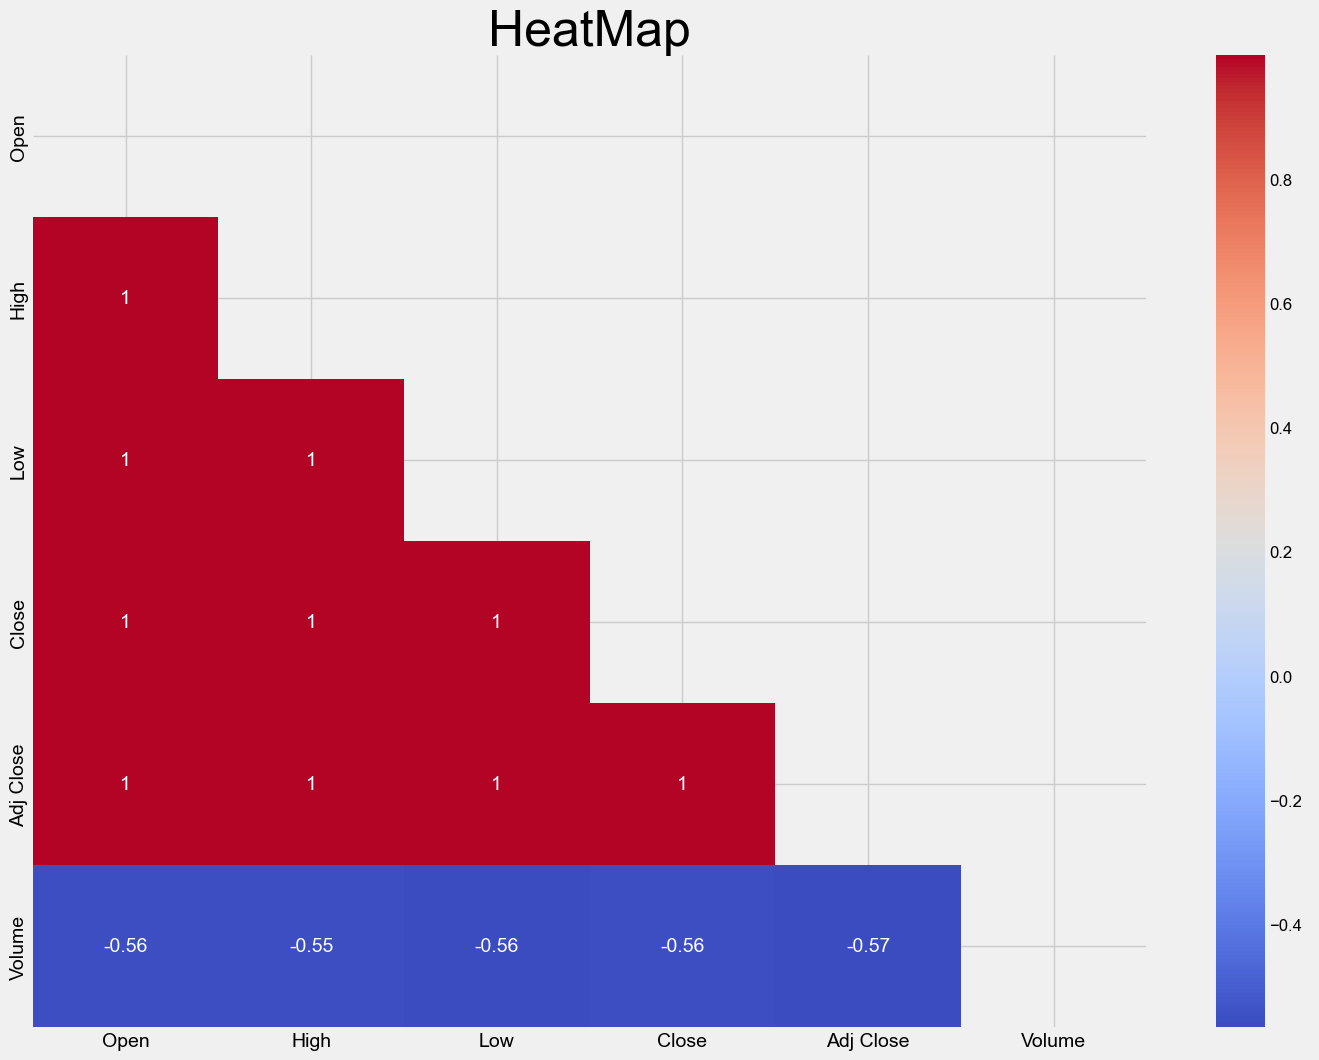

In [19]:
##HeatMap to Verify Multicollinearity between Features
fig = plt.figure(figsize=(16,12))
matrix = np.triu(data.corr())
ax = sns.heatmap(data.corr(),annot=True,annot_kws={"size":14},mask=matrix,cmap='coolwarm')
ax.tick_params(labelsize=14)
sns.set(font_scale=3)
ax.set_title('HeatMap')
plt.style.use('fivethirtyeight')
plt.show()

In [20]:
##Data after feature selection
data_feature_selected = data.drop(axis=1,labels=['Open','High','Low','Close','Volume'])


In [21]:
col_order = ['Date','Adj Close']
data_feature_selected = data_feature_selected.reindex(columns=col_order)
data_feature_selected

,Date,Adj Close
Date,,
2012-01-03,2012-01-03,50.765709
2012-01-04,2012-01-04,51.038536
2012-01-05,2012-01-05,51.605175
2012-01-06,2012-01-06,52.144630
2012-01-09,2012-01-09,52.061932
...,...,...
2019-12-23,2019-12-23,282.054138
2019-12-24,2019-12-24,282.322266
2019-12-26,2019-12-26,287.923645


# Resampling

In [22]:
##Resample Data to Monthly instead of Daily by Aggregating Using Mean
monthly_mean = data_feature_selected['Adj Close'].resample('M').mean()

In [23]:
monthly_data = monthly_mean.to_frame()
monthly_data

,Adj Close
Date,
2012-01-31,52.907298
2012-02-29,61.424381
2012-03-31,71.292448
2012-04-30,74.810151
2012-05-31,69.708045
...,...
2019-08-31,202.738817
2019-09-30,215.853332
2019-10-31,232.974974


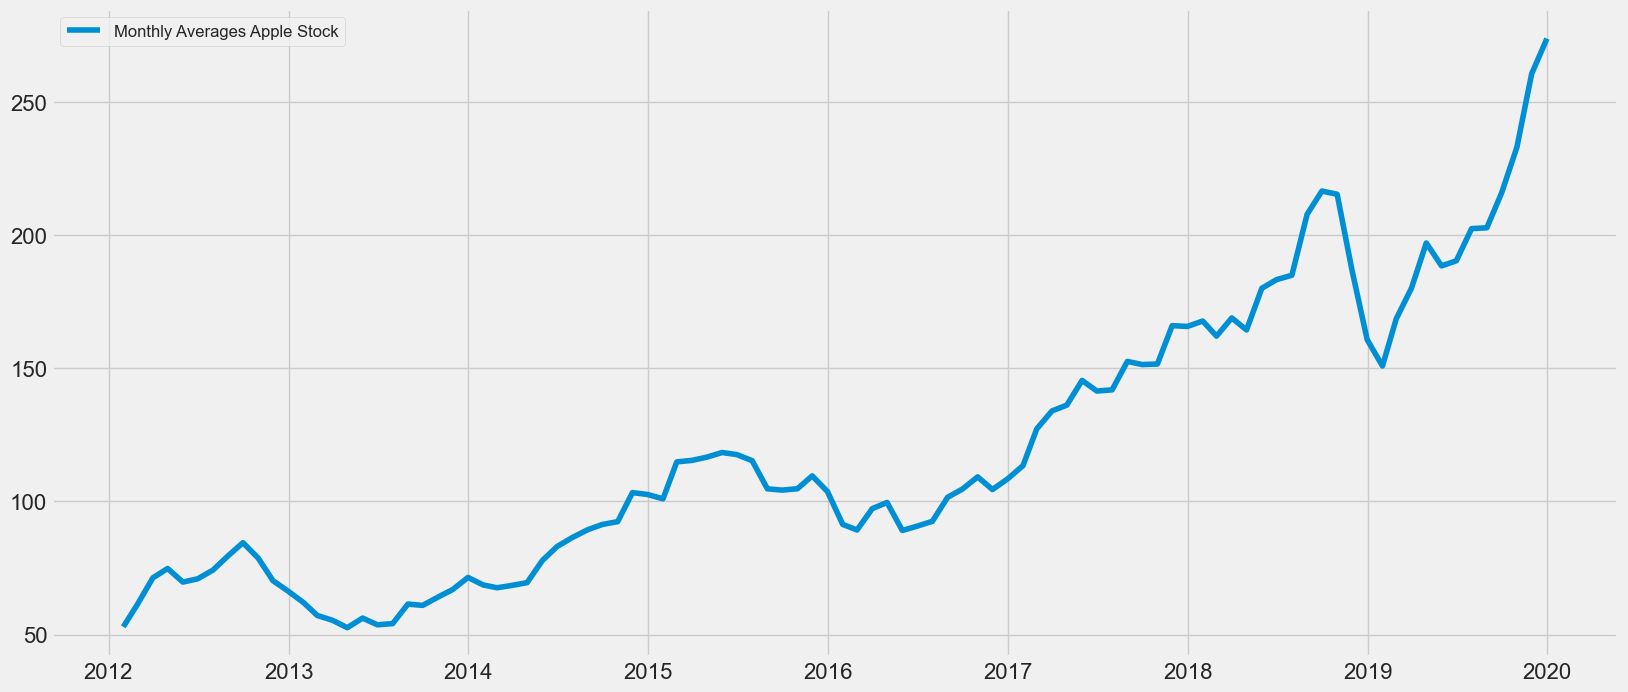

In [24]:
##Monthly Stock Price 
fig = plt.figure(figsize=(18,8))
plt.plot(monthly_data['Adj Close'],label='Monthly Averages Apple Stock')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax.set_title('Monthly Resampled Data')
plt.style.use('fivethirtyeight')
plt.legend(prop={'size': 12})
plt.show()

# Exploratory Data Analysis

In [25]:
monthly_data['Year'] = monthly_data.index.year
monthly_data['Month'] = monthly_data.index.strftime('%B')
monthly_data['dayofweek'] = monthly_data.index.strftime('%A')
monthly_data['quarter'] = monthly_data.index.quarter
monthly_data

,Adj Close,Year,Month,dayofweek,quarter
Date,,,,,
2012-01-31,52.907298,2012,January,Tuesday,1
2012-02-29,61.424381,2012,February,Wednesday,1
2012-03-31,71.292448,2012,March,Saturday,1
2012-04-30,74.810151,2012,April,Monday,2
2012-05-31,69.708045,2012,May,Thursday,2
...,...,...,...,...,...
2019-08-31,202.738817,2019,August,Saturday,3
2019-09-30,215.853332,2019,September,Monday,3
2019-10-31,232.974974,2019,October,Thursday,4


(array([0.   , 0.002, 0.004, 0.006, 0.008, 0.01 , 0.012]),
 [Text(0, 0.0, '0.000'),
  Text(0, 0.002, '0.002'),
  Text(0, 0.004, '0.004'),
  Text(0, 0.006, '0.006'),
  Text(0, 0.008, '0.008'),
  Text(0, 0.01, '0.010'),
  Text(0, 0.012, '0.012')])

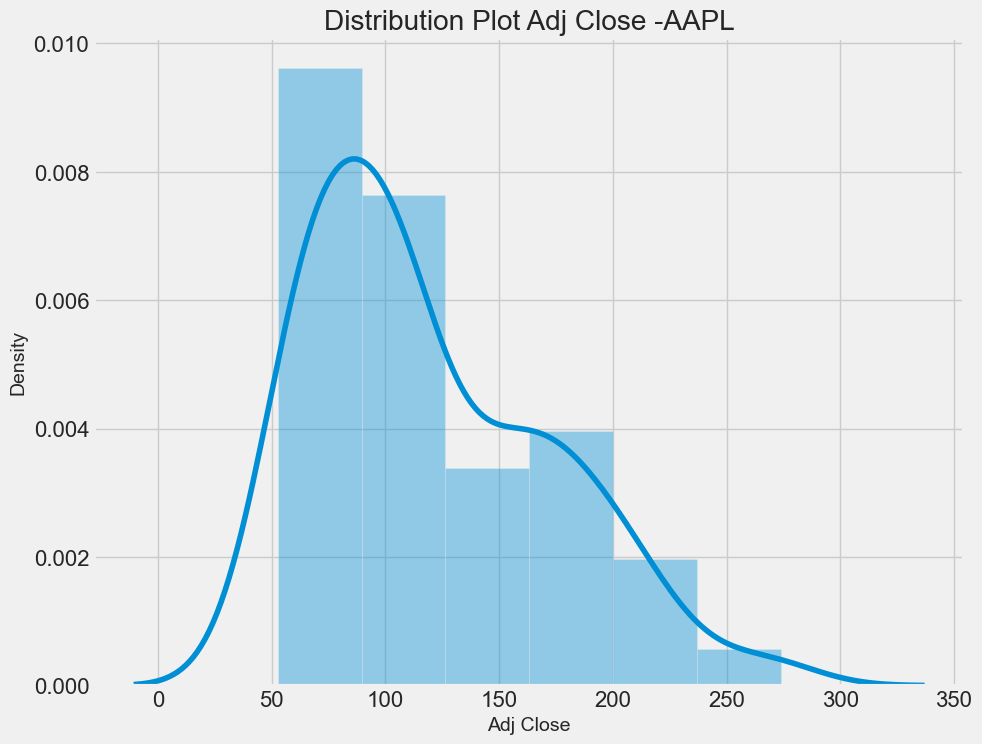

In [26]:
##Checking Distribution of Our Data 
fig = plt.figure(figsize=(10,8))
sns.distplot(monthly_data['Adj Close']).set_title("Distribution Plot Adj Close -AAPL")
ax.tick_params(labelsize=12)
sns.set(font_scale=1)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)


**Distribution Plot Inference** : Distribution shows Right Skew

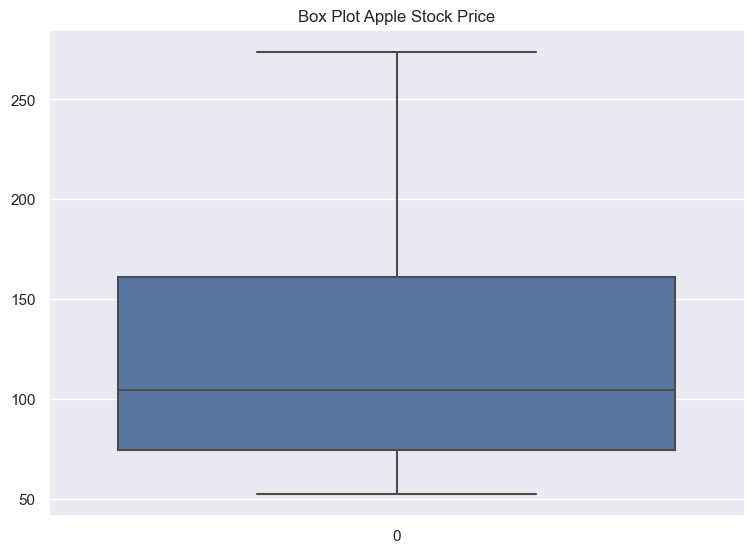

In [27]:
fig = plt.figure(figsize=(8,6))
sns.boxplot(monthly_data['Adj Close']).set_title('Box Plot Apple Stock Price')
plt.style.context('fivethirtyeight')


**Box-Plot Inference** :- 

->Distribution shows Right Skew 

->Outlier towards the higher end around Stock price of 300$

Text(0.5, 1.0, 'QQ Plot Apple Stock Price')

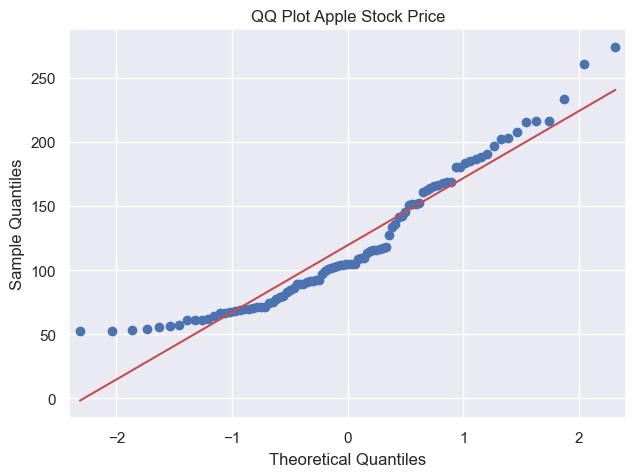

In [28]:
qq_plot = qq(monthly_data['Adj Close'],line='s')
plt.title('QQ Plot Apple Stock Price')

**QQ plot Inference :-**

->Heavy Tailed Distribution-Curve at Extremities

-> Shows extent of both right and left skews 

->Shows Distribution is Not following Gaussian Normal Distribution


In [29]:
print('Skewness of Distribution is ',monthly_data['Adj Close'].skew())
print('Kurtosis of Distribution is ',monthly_data['Adj Close'].kurtosis())

Skewness of Distribution is  0.8054131572723979
Kurtosis of Distribution is  -0.11205074257880643


Stock Price is Heavily skewed -Right tailed Skewness


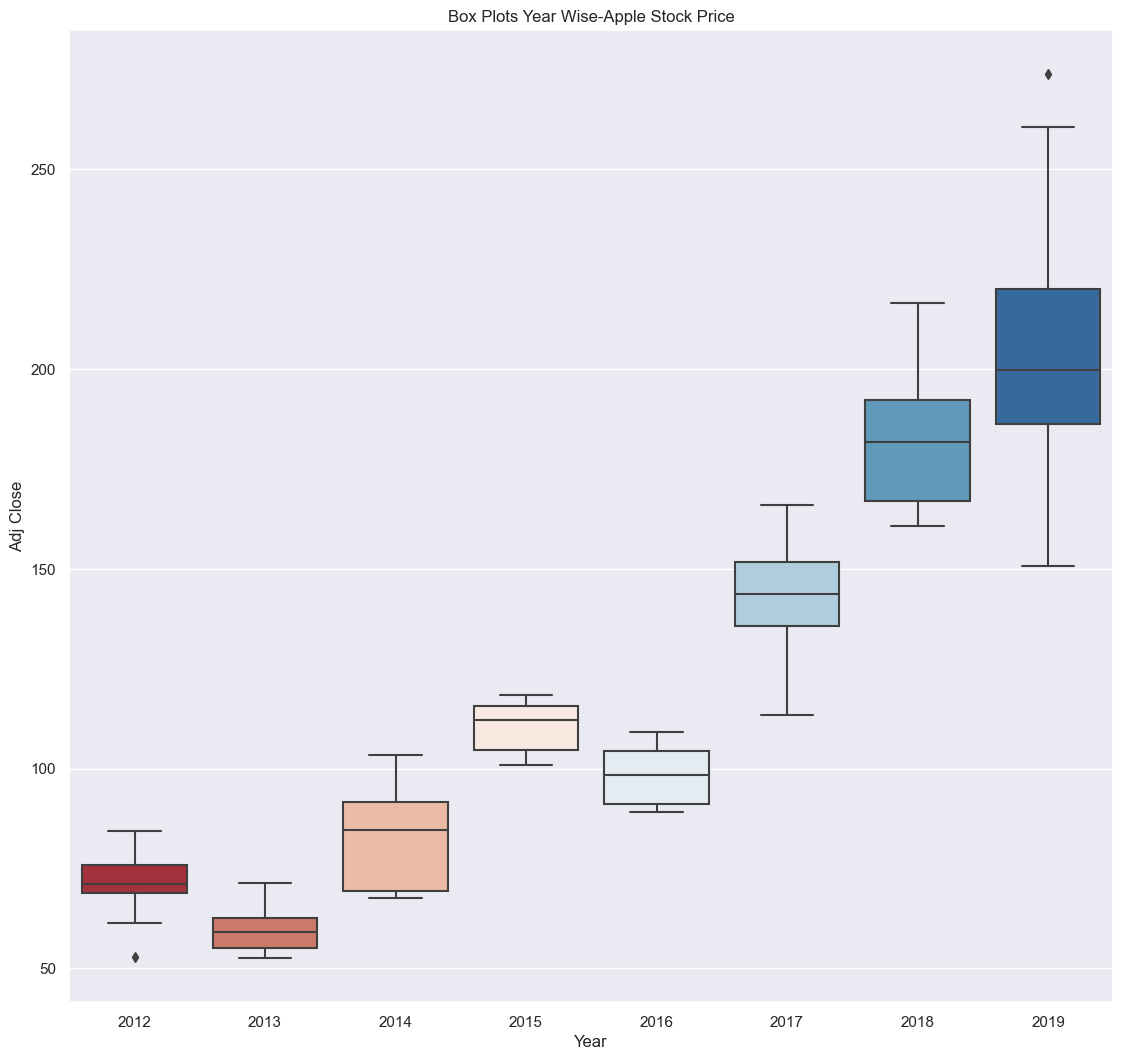

In [30]:
plt.figure(figsize=(12,12))
ax = sns.boxplot(x=monthly_data['Year'],y=monthly_data['Adj Close'],palette='RdBu')
ax.set_title('Box Plots Year Wise-Apple Stock Price')
plt.style.context('fivethirtyeight')

**Inferences Box Plot**

->Outliers Present in Year 2012 and 2019

->Lot of Variability in Years 2014, 2017-19

->2019 most volatile year among all years

->Upward Rising Trend is shown 

In [31]:
group_by_yr = []
list_years = monthly_data['Year'].unique()
dict_IQR = {}
for yr in list_years:
  group_by_yr.append('df' + str(yr)) 

for enum,yr in enumerate(list_years):
   group_by_yr[enum] = monthly_data[str(yr)]['Adj Close']
   dict_IQR[str(yr)] = stats.iqr(group_by_yr[enum])

In [32]:
##Interquartile Range(IQR) Year Wise for Stock Price
dict_IQR

{'2012': 6.933146515313851,
 '2013': 7.476562772903726,
 '2014': 22.34296344824017,
 '2015': 11.10740590584416,
 '2016': 13.310573720864653,
 '2017': 16.22455365139379,
 '2018': 25.26202036594205,
 '2019': 33.78399483999857}

Text(0, 0.5, 'InterQuartile Range')

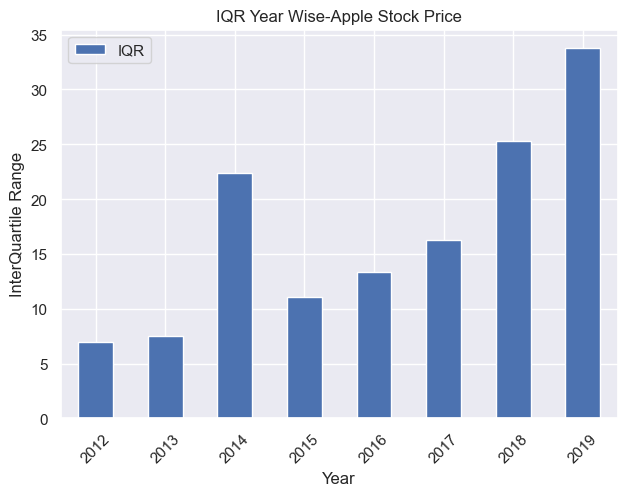

In [33]:

IQR_df = pd.DataFrame(dict_IQR.items(),columns=['Year','IQR'])
IQR_df.index = IQR_df['Year']
IQR_df.plot(kind='bar')
plt.xticks(rotation=45)
plt.style.context('fivethirtyeight')
plt.title('IQR Year Wise-Apple Stock Price')
plt.ylabel('InterQuartile Range')


->When Data is Not Normal Inter-Quartile Range(IQR)  is Better Variability Metric than Standard Deviation as IQR is not affected by outliers.

->As observed with BoxPlot 2014 and 2019 are the most volatile Years for Apple Stock

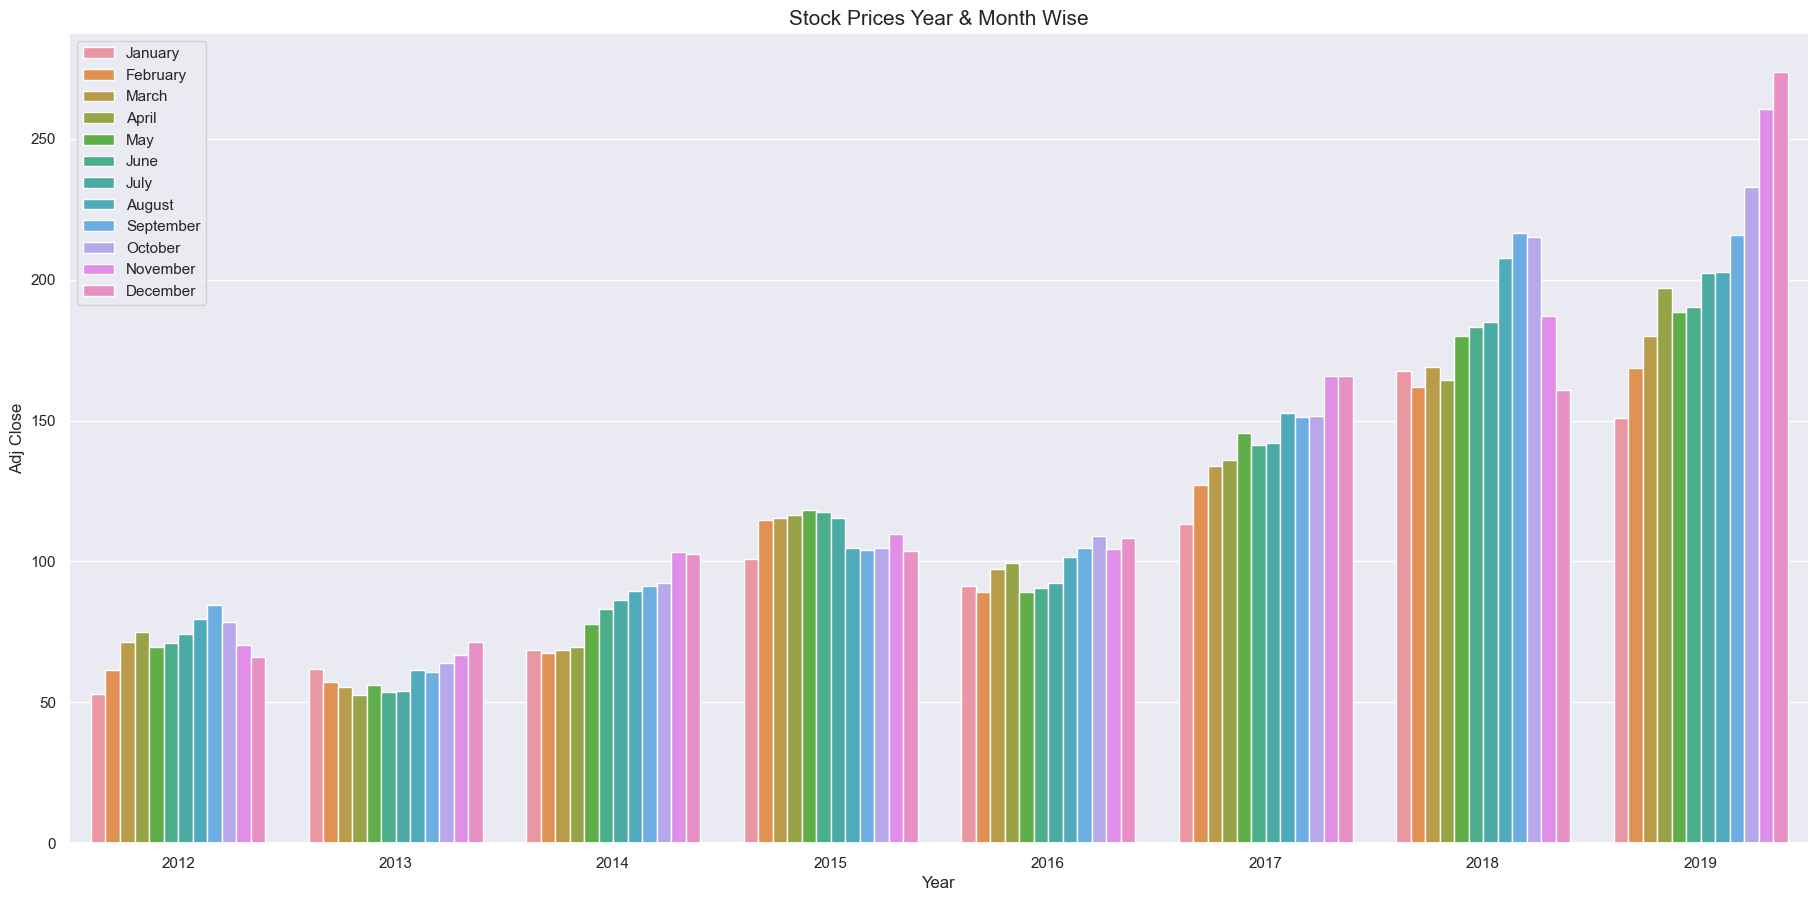

In [34]:
fig, ax = plt.subplots(figsize=(20,10))
palette = sns.color_palette("mako_r", 4)
a = sns.barplot(x="Year", y="Adj Close",hue = 'Month',data=monthly_data)
a.set_title("Stock Prices Year & Month Wise",fontsize=15)
plt.legend(loc='upper left')
plt.show()

Above figure shows that the Period from July-September seems to push stock price above in comparision to other months. The primary reason for this is as Apple has a product cycle release date during this time,the Wallstreet is excited about upcoming products .



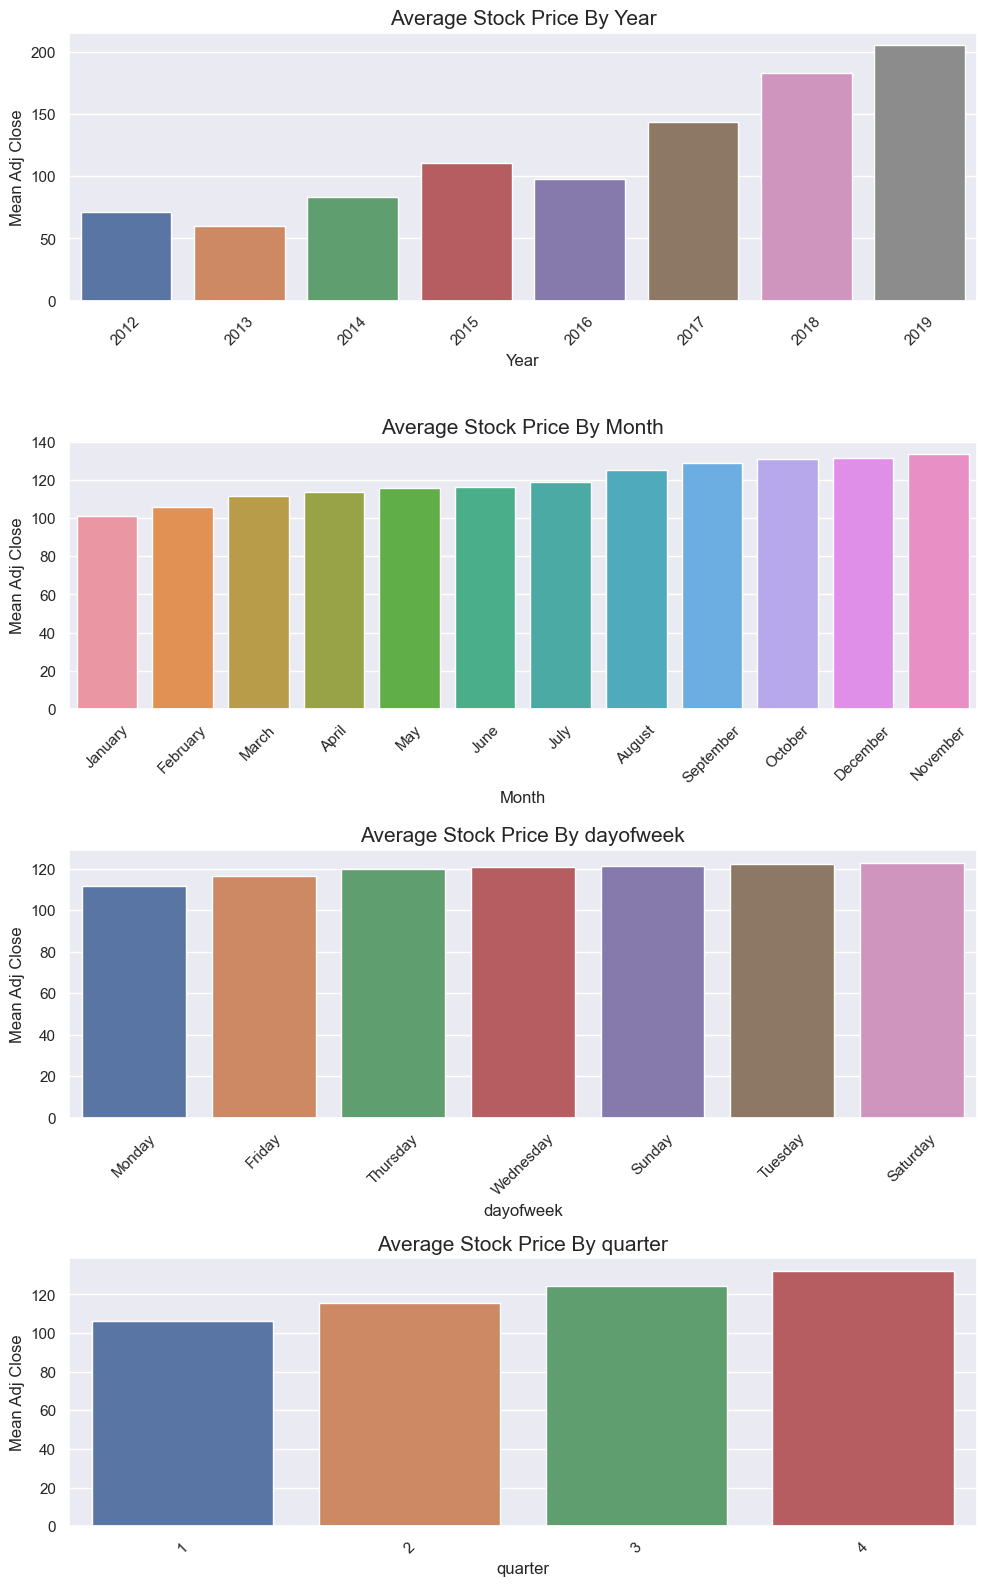

In [35]:
fig = plt.figure(figsize=(10,16))
fig.set_size_inches(10,16)
group_cols = monthly_data.columns

for enum,i in enumerate(group_cols[1:]):
  ax = fig.add_subplot(4,1,enum+1)
  Aggregated = pd.DataFrame(monthly_data.groupby(str(i))["Adj Close"].mean()).reset_index().sort_values('Adj Close')
  sns.barplot(data=Aggregated,x=str(i),y="Adj Close",ax=ax)
  ax.set(xlabel=str(i), ylabel='Mean Adj Close')
  ax.set_title("Average Stock Price By {}".format(str(i)),fontsize=15)
  plt.xticks(rotation=45)
  
plt.tight_layout(pad=1)

->According to Mean price by Years, 2013 and 2016 are the only years where Mean price is lower than previous Year.

->Average Stock Price is lower at start of the week in comparision to the end of the week.

->The Average Price is Highest in the Month of November.

->Q4 is the best for Apple according to average stock price.
By sales figures Q4 has always been strong for Apple since the new product cycle takes place and its the Holiday period. We also observe this as a seasonal effect for Apple.



# Decomposition of Time Series


In [36]:
rcParams['figure.figsize'] = 18, 8
plt.figure(figsize=(20,16))
decomposed_series = sd(monthly_data['Adj Close'],model='additive',freq=12)
decomposed_series.plot()
plt.show()

TypeError: seasonal_decompose() got an unexpected keyword argument 'freq'

<Figure size 2000x1600 with 0 Axes>

In [38]:
##Drilling Down and Observing Seasonality
decomposed_series.seasonal['2012':'2013'].plot()
fig = plt.figure(figsize=(8,8))

NameError: name 'decomposed_series' is not defined

**Inferences By Decomposition :-**

->Trend : Overall an Upward Trend

-> Seasonality :There appears to be seasonality,AAPL has rallied during the Holiday season as expected. Since Holiday period has good sales for Apple Over the Years.


# Stationarity of Time Series 

**Stationarity Test of Time Series**

Using Augmented Dickey-Fuller(ADF) Test

**Null Hypothesis** : Time series has a unit root -*It is non-stationary*

**Alternate Hypothesis** :   Time series does not have a unit root -*It is stationary*


Time Series is Stationary if we have constant mean,constant variance and No Trend and Seasonality.

In [ ]:
##ADF Test-Statsmodels Library

def ad_fuller_func(X):
  result_ad_fuller = adfuller(X)
  print('ADF Statistic: %f' % result_ad_fuller[0])
  print('p-value: %f' %result_ad_fuller[1])
  print('Critical Values:')
  for key, value in result_ad_fuller[4].items():
	  print('\t%s: %.3f' % (key, value))
 
  if result_ad_fuller[0] < result_ad_fuller[4]['5%']:
    print('Reject Null Hypothesis(Ho)-Time Series is Stationary')
  else:
    print('Failed to Reject Ho-Time Series is Non-Stationary')



In [ ]:
ad_fuller_func(monthly_data['Adj Close'])

Time Series is Not Stationary as observed earlier also by Decomposition(Trend and Seasonality Present)

Statistically verified by ADF Test

AutoCorrelation Function(ACF)

In [ ]:
fig,(ax1,ax2) = plt.subplots(2,figsize=(12,12))
acf = plot_acf(monthly_data['Adj Close'],lags=90,ax=ax1)
ax1.set_title('AutoCorrelation Long Term')
acf = plot_acf(monthly_data['Adj Close'],lags=30,ax=ax2)
ax2.set_title('AutoCorrelation Short Term')
ax1.set_ylabel('Correlation')
ax1.set_xlabel('Lags')
ax2.set_ylabel('Correlation')
ax2.set_xlabel('Lags')

Interpreting ACF Plot :-

->Slow Decay of correlation values indicates that the future values are heavily dependent on the lagged values . This shows that the series is not random and good for time series modelling .

->Also tells us series is Non-stationary

->It indicates a MA(1) process

In [ ]:
fig,(ax1,ax2) = plt.subplots(2,figsize=(10,10))
pacf = plot_pacf(monthly_data['Adj Close'],lags=90,ax=ax1)
ax1.set_title('Partial AutoCorrelation Long Term')
pacf = plot_pacf(monthly_data['Adj Close'],lags=30,ax=ax2)
ax2.set_title('Partial AutoCorrelation Short Term')
ax1.set_ylabel('Correlation')
ax1.set_xlabel('Lags')
ax2.set_ylabel('Correlation')
ax2.set_xlabel('Lags')
plt.tight_layout(pad=1)

Interpreting PACF Plot :-

->Sudden Decay at Lag-1

->Order of series seems AR(1)



**Transformations To Make Series Stationary**

In [ ]:
##Differencing By 1
monthly_diff = monthly_data['Adj Close'] - monthly_data['Adj Close'].shift(1)

In [ ]:
monthly_diff[1:].plot(c='grey')
monthly_diff[1:].rolling(20).mean().plot(label='Rolling Mean',c='orange')
monthly_diff[1:].rolling(20).std().plot(label='Rolling STD',c='yellow')
plt.legend(prop={'size': 12})

The series looks stationary as its having constant mean and variance .

In [ ]:
##Checking if Time Series is Stationary by Running ADF Test
ad_fuller_func(monthly_diff[1:])

ADF Statistic: -6.501865
p-value: 0.000000
Critical Values:
	1%: -3.502
	5%: -2.893
	10%: -2.583
Reject Null Hypothesis(Ho)-Time Series is Stationary


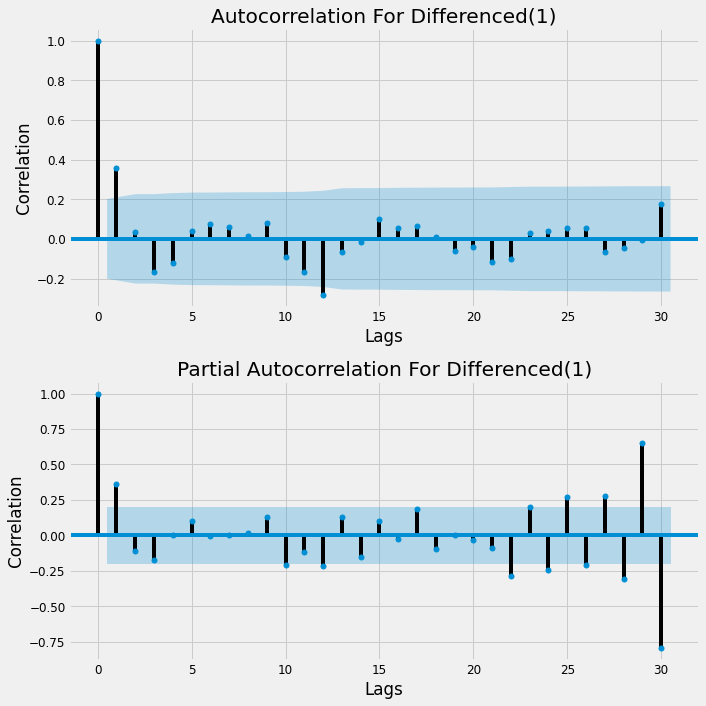

In [ ]:
fig,(ax1,ax2) = plt.subplots(2,figsize=(10,10))
acf = plot_acf(monthly_diff[1:],lags=30,ax=ax1)
pacf = plot_pacf(monthly_diff[1:],lags=30,ax=ax2)
ax1.set_title('Autocorrelation For Differenced(1)')
ax1.set_ylabel('Correlation')
ax1.set_xlabel('Lags')
ax2.set_title('Partial Autocorrelation For Differenced(1)')
ax2.set_ylabel('Correlation')
ax2.set_xlabel('Lags')
plt.tight_layout(pad=1)

According to the ACF and PACF we can confirm that Differencing once has transformed series into Stationary

# **Modelling Seasonal ARIMA**

In [37]:
modelling_series = monthly_data['Adj Close']
modelling_series

Date
2012-01-31     52.907298
2012-02-29     61.424381
2012-03-31     71.292448
2012-04-30     74.810151
2012-05-31     69.708045
                 ...    
2019-08-31    202.738817
2019-09-30    215.853332
2019-10-31    232.974974
2019-11-30    260.569057
2019-12-31    273.780717
Freq: M, Name: Adj Close, Length: 96, dtype: float64

**Train-Test Split**

In [38]:
train,test = split(modelling_series,train_size=0.6,shuffle=False)

In [39]:
train.head(2)

Date
2012-01-31    52.907298
2012-02-29    61.424381
Freq: M, Name: Adj Close, dtype: float64

In [40]:
test.head(2)

Date
2016-10-31    109.212791
2016-11-30    104.453936
Freq: M, Name: Adj Close, dtype: float64

In [41]:
print('Train',len(train))
print('Test',len(test))

Train 57
Test 39


In [42]:
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of grid search Model parameter combinations for Seasonal-ARIMA')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))


Examples of grid search Model parameter combinations for Seasonal-ARIMA
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)


In [43]:
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of grid search Model parameter combinations for Seasonal-ARIMA')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))

Examples of grid search Model parameter combinations for Seasonal-ARIMA
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)


Carrying out Grid Search to Select Parameters especially for Seasonal Component of the Time Series .

Parameters for Series already indicate Non-Seasonality Part with Order (1,1,1).

AR(1) derived by the PACF plot

MA(1) derived by the ACF Plot

Differencing(1) derived by differencing and observing stationarity.


# Hyper Parameter Tuning for Model Order

In [44]:
list_param = []
list_param_seasonal=[]
list_results_aic=[]

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            model = sm.tsa.statespace.SARIMAX(train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = model.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            
            list_param.append(param)
            list_param_seasonal.append(param_seasonal)
            list_results_aic.append(results.aic)
        except:
            continue


ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:660.0393312743108
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:489.7460184417519
ARIMA(0, 0, 0)x(0, 0, 2, 12)12 - AIC:353.4965874358292
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:407.6767009067285
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1397.2676209570204
ARIMA(0, 0, 0)x(0, 1, 2, 12)12 - AIC:190.03613003690205
ARIMA(0, 0, 0)x(0, 2, 0, 12)12 - AIC:329.453039324708
ARIMA(0, 0, 0)x(0, 2, 1, 12)12 - AIC:199.04766684849108
ARIMA(0, 0, 0)x(0, 2, 2, 12)12 - AIC:77.50850683065755
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:416.9246268146381
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:390.86362421379687
ARIMA(0, 0, 0)x(1, 0, 2, 12)12 - AIC:291.60796504060784
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:313.34763567779584
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:306.2838921342166
ARIMA(0, 0, 0)x(1, 1, 2, 12)12 - AIC:191.57863156058087
ARIMA(0, 0, 0)x(1, 2, 0, 12)12 - AIC:216.19853387952406
ARIMA(0, 0, 0)x(1, 2, 1, 12)12 - AIC:199.62020585354716
ARIMA(0, 0, 0)x(1, 2, 2, 12)12 - AIC:72.11098812156634
AR

ARIMA(0, 1, 2)x(1, 1, 1, 12)12 - AIC:910.7531801842123
ARIMA(0, 1, 2)x(1, 1, 2, 12)12 - AIC:123.58993459412267
ARIMA(0, 1, 2)x(1, 2, 0, 12)12 - AIC:162.47087274969508
ARIMA(0, 1, 2)x(1, 2, 1, 12)12 - AIC:138.00872811699796
ARIMA(0, 1, 2)x(1, 2, 2, 12)12 - AIC:40.94241169908887
ARIMA(0, 1, 2)x(2, 0, 0, 12)12 - AIC:206.74694722866894
ARIMA(0, 1, 2)x(2, 0, 1, 12)12 - AIC:208.71671431941544
ARIMA(0, 1, 2)x(2, 0, 2, 12)12 - AIC:188.42498977790845
ARIMA(0, 1, 2)x(2, 1, 0, 12)12 - AIC:141.08817550967893
ARIMA(0, 1, 2)x(2, 1, 1, 12)12 - AIC:594.9121960177755
ARIMA(0, 1, 2)x(2, 1, 2, 12)12 - AIC:117.1953715292081
ARIMA(0, 1, 2)x(2, 2, 0, 12)12 - AIC:69.02206525933968
ARIMA(0, 1, 2)x(2, 2, 1, 12)12 - AIC:71.0205287054747
ARIMA(0, 1, 2)x(2, 2, 2, 12)12 - AIC:42.00845640789012
ARIMA(0, 2, 0)x(0, 0, 0, 12)12 - AIC:357.94470204967416
ARIMA(0, 2, 0)x(0, 0, 1, 12)12 - AIC:285.012654274989
ARIMA(0, 2, 0)x(0, 0, 2, 12)12 - AIC:211.92408619793062
ARIMA(0, 2, 0)x(0, 1, 0, 12)12 - AIC:306.5976248307786
ARI

ARIMA(1, 0, 1)x(2, 2, 2, 12)12 - AIC:66.71176678257066
ARIMA(1, 0, 2)x(0, 0, 0, 12)12 - AIC:334.77081553358414
ARIMA(1, 0, 2)x(0, 0, 1, 12)12 - AIC:265.4959962510759
ARIMA(1, 0, 2)x(0, 0, 2, 12)12 - AIC:198.5735335507294
ARIMA(1, 0, 2)x(0, 1, 0, 12)12 - AIC:290.4372269933783
ARIMA(1, 0, 2)x(0, 1, 1, 12)12 - AIC:1503.591516158374
ARIMA(1, 0, 2)x(0, 1, 2, 12)12 - AIC:128.67382119996256
ARIMA(1, 0, 2)x(0, 2, 0, 12)12 - AIC:236.3875420490461
ARIMA(1, 0, 2)x(0, 2, 1, 12)12 - AIC:141.27080590315094
ARIMA(1, 0, 2)x(0, 2, 2, 12)12 - AIC:57.67085440151726
ARIMA(1, 0, 2)x(1, 0, 0, 12)12 - AIC:276.3112366429173
ARIMA(1, 0, 2)x(1, 0, 1, 12)12 - AIC:267.1102766408586
ARIMA(1, 0, 2)x(1, 0, 2, 12)12 - AIC:200.49644548698578
ARIMA(1, 0, 2)x(1, 1, 0, 12)12 - AIC:223.24952137756634
ARIMA(1, 0, 2)x(1, 1, 1, 12)12 - AIC:209.92547442065637
ARIMA(1, 0, 2)x(1, 1, 2, 12)12 - AIC:128.3783116170715
ARIMA(1, 0, 2)x(1, 2, 0, 12)12 - AIC:163.38708479867694
ARIMA(1, 0, 2)x(1, 2, 1, 12)12 - AIC:143.11776200193933
AR

ARIMA(1, 2, 1)x(1, 1, 1, 12)12 - AIC:1118.0131843962429
ARIMA(1, 2, 1)x(1, 1, 2, 12)12 - AIC:126.28749534922896
ARIMA(1, 2, 1)x(1, 2, 0, 12)12 - AIC:148.76149475106553
ARIMA(1, 2, 1)x(1, 2, 1, 12)12 - AIC:141.5028947349365
ARIMA(1, 2, 1)x(1, 2, 2, 12)12 - AIC:52.077790529637525
ARIMA(1, 2, 1)x(2, 0, 0, 12)12 - AIC:198.47061044544012
ARIMA(1, 2, 1)x(2, 0, 1, 12)12 - AIC:200.44946419530785
ARIMA(1, 2, 1)x(2, 0, 2, 12)12 - AIC:195.0168893386866
ARIMA(1, 2, 1)x(2, 1, 0, 12)12 - AIC:131.18566147836623
ARIMA(1, 2, 1)x(2, 1, 1, 12)12 - AIC:703.6712201370045
ARIMA(1, 2, 1)x(2, 1, 2, 12)12 - AIC:121.3431415021974
ARIMA(1, 2, 1)x(2, 2, 0, 12)12 - AIC:57.34142540486182
ARIMA(1, 2, 1)x(2, 2, 1, 12)12 - AIC:59.44796885910339
ARIMA(1, 2, 1)x(2, 2, 2, 12)12 - AIC:53.32313882952946
ARIMA(1, 2, 2)x(0, 0, 0, 12)12 - AIC:320.68348288168045
ARIMA(1, 2, 2)x(0, 0, 1, 12)12 - AIC:254.01373542585117
ARIMA(1, 2, 2)x(0, 0, 2, 12)12 - AIC:187.4250043353325
ARIMA(1, 2, 2)x(0, 1, 0, 12)12 - AIC:276.04260007108
ARI

ARIMA(2, 1, 0)x(2, 2, 2, 12)12 - AIC:58.7707259263928
ARIMA(2, 1, 1)x(0, 0, 0, 12)12 - AIC:328.92347724535284
ARIMA(2, 1, 1)x(0, 0, 1, 12)12 - AIC:263.46409965060724
ARIMA(2, 1, 1)x(0, 0, 2, 12)12 - AIC:199.93465346864772
ARIMA(2, 1, 1)x(0, 1, 0, 12)12 - AIC:291.88049958768414
ARIMA(2, 1, 1)x(0, 1, 1, 12)12 - AIC:10.0
ARIMA(2, 1, 1)x(0, 1, 2, 12)12 - AIC:131.93438072793276
ARIMA(2, 1, 1)x(0, 2, 0, 12)12 - AIC:236.82412276308978
ARIMA(2, 1, 1)x(0, 2, 1, 12)12 - AIC:145.82832294246447
ARIMA(2, 1, 1)x(0, 2, 2, 12)12 - AIC:58.301437569535864
ARIMA(2, 1, 1)x(1, 0, 0, 12)12 - AIC:263.41747248787965
ARIMA(2, 1, 1)x(1, 0, 1, 12)12 - AIC:265.41197537827316
ARIMA(2, 1, 1)x(1, 0, 2, 12)12 - AIC:201.19753902209573
ARIMA(2, 1, 1)x(1, 1, 0, 12)12 - AIC:212.7295836295768
ARIMA(2, 1, 1)x(1, 1, 1, 12)12 - AIC:1378.7862675583997
ARIMA(2, 1, 1)x(1, 1, 2, 12)12 - AIC:130.96021221988866
ARIMA(2, 1, 1)x(1, 2, 0, 12)12 - AIC:147.4111872698278
ARIMA(2, 1, 1)x(1, 2, 1, 12)12 - AIC:146.80331678003793
ARIMA(2, 1

ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:350.75081385350666

ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:332.11071968501557

ARIMA(1, 1, 1)x(1, 2, 0, 12)12 - AIC:300.4957600928522

ARIMA(1, 1, 1)x(1, 2, 1, 12)12 - AIC:286.2126039361744

ARIMA(1, 1, 1)x(2, 0, 0, 12)12 - AIC:331.740255110838

ARIMA(1, 1, 1)x(2, 0, 1, 12)12 - AIC:333.46473592208514

ARIMA(1, 1, 1)x(2, 0, 2, 12)12 - AIC:324.7832626860535

ARIMA(1, 1, 1)x(2, 1, 0, 12)12 - AIC:262.4409992969335

ARIMA(1, 1, 1)x(2, 1, 1, 12)12 - AIC:256.71390487682834

ARIMA(1, 1, 1)x(2, 2, 0, 12)12 - AIC:206.26186908985358

ARIMA(1, 1, 1)x(2, 2, 1, 12)12 - AIC:206.79066847021136

ARIMA(1, 1, 2)x(0, 0, 0, 12)12 - AIC:459.6835652708871

ARIMA(1, 1, 2)x(0, 0, 1, 12)12 - AIC:386.9565978957946

ARIMA(1, 1, 2)x(0, 0, 2, 12)12 - AIC:3937.920519627023

By Observing the Lowest AIC , we come to Seasonality Order of (2,2,0)12 and non-seasonal component is (1,1,1) as derived earlier by correlograms.

Seasonal Arima is used as we have seasonality component present.
During Fall time period (July-Nov) the stock seems to rally on the news of product launch and product releases in that cycle of the year.

# Back-Testing Training and Testing Data 

> Since we cannot use cross validation in our time series based datasets,as it can jumble the datasets during different folds.

> This is not true of time series data, where the time dimension of observations means that we cannot randomly split them into groups. 
We can use backtesting method for time series.

> In backtesting we can create multiple train-test splits keeping in mind the temporal order of our data during splits . For example if I have dataset between Jan to Dec 

Split - 1 : Train Data (Jan to Aug) + Test Data (Aug to Dec)

Split - 2 : Train Data (Jan to Sept) + Test Data (Sept to Dec)

Split - 3 : Train Daata (Jan to Oct) + Test Data (Oct to Dec) and so on ...
We can have multiple splits in our dataset to validate our model rather than just one split like traditional train test splits .

Reference : https://machinelearningmastery.com/backtest-machine-learning-models-time-series-forecasting/


ValueError: The number of FixedLocator locations (7), usually from a call to set_ticks, does not match the number of labels (5).

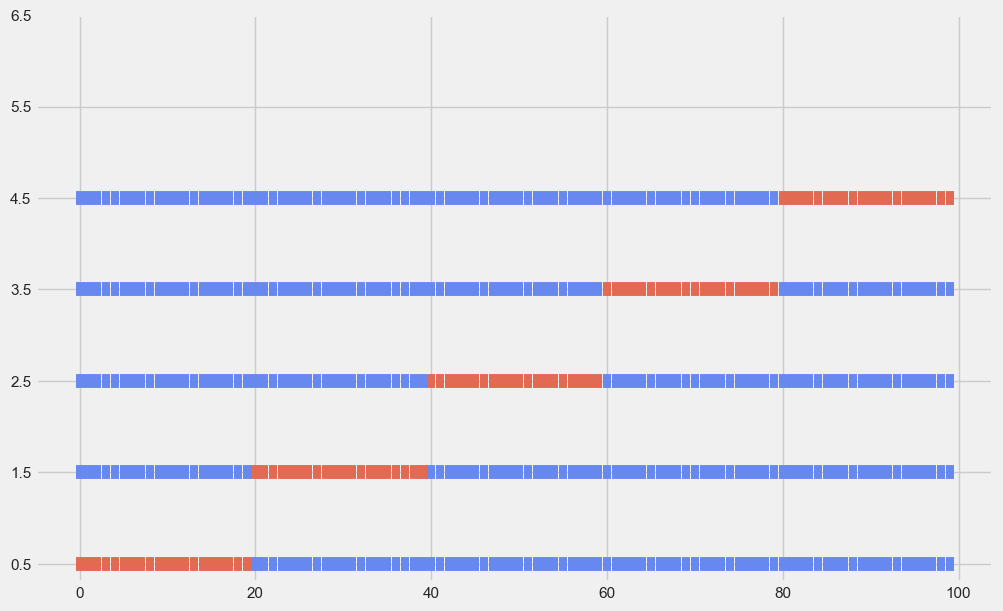

In [45]:
## Using TimeSeriesSplit from sklearn library
## Citation : https://www.kaggle.com/tomwarrens/timeseriessplit-how-to-use-it

pd.options.display.max_columns = 30
plt.rcParams.update({'figure.max_open_warning': 0})
plt.style.use('fivethirtyeight')
cmap_data = plt.cm.Paired
cmap_cv = plt.cm.coolwarm
warnings.filterwarnings('ignore')

cvs = [KFold, ShuffleSplit, StratifiedKFold, StratifiedShuffleSplit, TimeSeriesSplit]
n_points = 100
n_splits = 5
X = np.random.randn(100, 10)
percentiles_classes = [.1, .3, .6]
y = np.hstack([[ii] * int(100 * perc) for ii, perc in enumerate(percentiles_classes)])

# Function modified from https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html

def plot_cv_indices(cv, n_splits, X, y, date_col = None):
    """Create a sample plot for indices of a cross-validation object."""
    
    fig, ax = plt.subplots(1, 1, figsize = (11, 7))
    
    # Generate the training/testing visualizations for each CV split
    for ii, (tr, tt) in enumerate(cv.split(X=X, y=y)):
        # Fill in indices with the training/test groups
        indices = np.array([np.nan] * len(X))
        indices[tt] = 1
        indices[tr] = 0

        # Visualize the results
        ax.scatter(range(len(indices)), [ii + .5] * len(indices),
                   c=indices, marker='_', lw=10, cmap=cmap_cv,
                   vmin=-.2, vmax=1.2)


    # Formatting
    yticklabels = list(range(n_splits))
    
    if date_col is not None:
        tick_locations  = ax.get_xticks()
        tick_dates = [" "] + date_col.iloc[list(tick_locations[1:-1])].astype(str).tolist() + [" "]

        tick_locations_str = [str(int(i)) for i in tick_locations]
        new_labels = ['\n\n'.join(x) for x in zip(list(tick_locations_str), tick_dates) ]
        ax.set_xticks(tick_locations)
        ax.set_xticklabels(new_labels)
    
    ax.set(yticks=np.arange(n_splits+2) + .5, yticklabels=yticklabels,
           xlabel='Sample index', ylabel="CV iteration",
           ylim=[n_splits+0.2, -.2])
    ax.legend([Patch(color=cmap_cv(.8)), Patch(color=cmap_cv(.02))],
              ['Testing set', 'Training set'], loc=(1.02, .8))
    ax.set_title('{}'.format(type(cv).__name__), fontsize=15)
    

for i, cv in enumerate(cvs):
    this_cv = cv(n_splits=n_splits)
    plot_cv_indices(this_cv, n_splits, X, y, date_col=None)

In [ ]:
## Using TimeSeriesSplit from sklearn library
time_series_splits = TimeSeriesSplit(n_splits=4)
X = modelling_series.values
pyplot.figure(1)
fig = plt.figure(figsize=(12, 12))

index = 1
for train_index, test_index in time_series_splits.split(X):
	train = X[train_index]
	test = X[test_index]
	print('Observations: %d' % (len(train) + len(test)))
	print('Training Observations: %d' % (len(train)))
	print('Testing Observations: %d' % (len(test)))
    
# 	pyplot.subplot(310 + index)
# 	pyplot.plot(train)
# 	pyplot.plot([None for i in train] + [x for x in test])
#     # pyplot.title(''.format())
# 	index += 1
# pyplot.show()

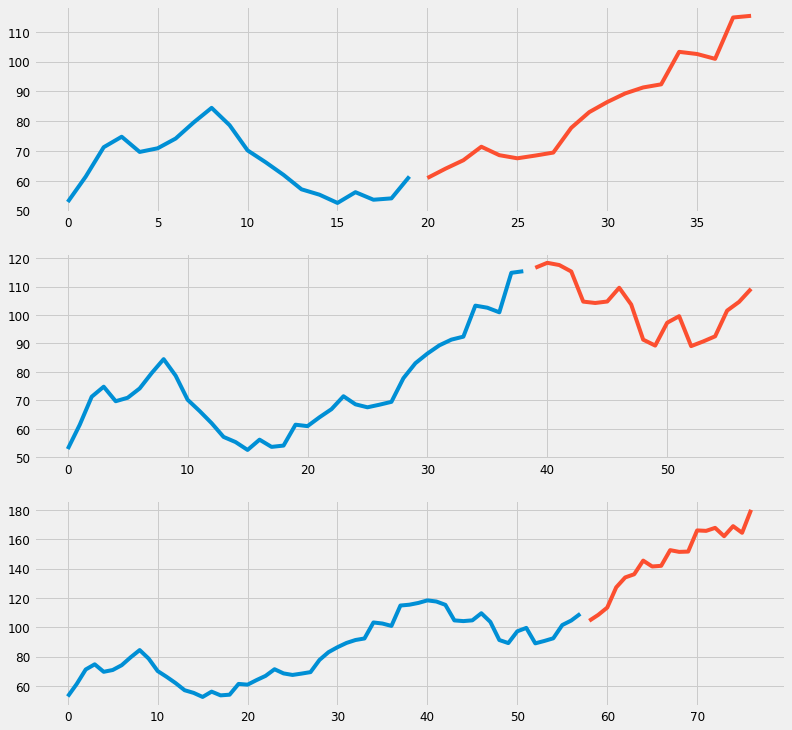

Train and Test different pairs across time series.

In [ ]:
train_list = {}
test_list = {}
time_series_splits = TimeSeriesSplit(n_splits=5)
X = modelling_series.values

index = 1
for train_index, test_index in time_series_splits.split(X):
    train = X[train_index]
    test = X[test_index]
    train_list[index] = train
    test_list[index] = test
    index += 1

In [ ]:
def backtest_model(train,test):
    model = sm.tsa.SARIMAX(train,order=(1,1,1),seasonal_order=(2,2,0,12))
    results=model.fit()


    # train_get_dates_beginning = '2012-01-31'
    # train_get_dates_ending = str(modelling_series.index[len(train)].date())
    # test_get_dates_beginning = train_get_dates_ending
    # test_get_dates_ending = str(modelling_series.index[len(train)+len(test)].date())


    # forecasts_train = results.predict(start=train_get_dates_beginning,end=train_get_dates_ending)
    # forecasts_test = results.predict(start=test_get_dates_beginning,end=test_get_dates_ending)

    forecasts_train = results.predict(start=0,end=len(train))
    forecasts_test = results.predict(start=len(train),end=len(train)+len(test))


    fig,(ax1,ax2) = plt.subplots(2,figsize=(18,10))

    train = pd.DataFrame(train)
    test = pd.DataFrame(test)

    forecasts_train = pd.DataFrame(forecasts_train)
    forecasts_test = pd.DataFrame(forecasts_test)

    forecasts_train.plot(label='Forecasts',ax=ax1,title='SARIMA Forecasting -Train Data')
    train.plot(label='Actual',ax=ax1)
    ax1.set_ylabel('Stock Price')
    ax1.set_xlabel('Time')


    forecasts_test.plot(label='Forecasts',ax=ax2,title='SARIMA Forecasting -Test Data')
    test.plot(label='Actual',ax=ax2)
    ax2.set_ylabel('Stock Price')
    ax2.set_xlabel('Time')


    
    

    ax1.legend()
    ax2.legend()
    plt.tight_layout(pad=2)

# Backtest Set 1

In [ ]:
## Backtest Set-1
backtest_model(train_list[2],test_list[2])

# Backtest Set-2


In [ ]:
## Backtest Set-3
backtest_model(train_list[4],test_list[4])

# Backtest Set-3

In [ ]:
## Backtest Set-4
backtest_model(train_list[5],test_list[5])

By using backtesting we can validate our model on multiple train-test splits.
Red is the training set and blue indicates test set.

# Forecasting Seasonal ARIMA

In [ ]:
model = sm.tsa.SARIMAX(train,order=(1,1,1),seasonal_order=(2,2,0,12))
results=model.fit()
forecasts_train = results.predict(start='2012-01-31',end='2016-09-30')
forecasts_test = results.predict(start='2016-10-31',end='2019-12-31')

In [ ]:
##Function to Calculate Result Metrics
def result_metrics(test_series,forecast_series,model_name):
  print('Result Metrics for {}'.format(model_name))
  print('R2 Score : ',round(r2_score(test_series,forecast_series),3))
  print('Mean Squared Error : ',round(mean_squared_error(test_series,forecast_series),3))
  print('Mean Absolute Error : ',round(mean_absolute_error(test_series,forecast_series),3))

  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached cmdstanpy-0.9.5-py3-none-any.whl (37 kB)
  Using cached pystan-3.7.0-py3-none-any.whl (13 kB)
  Using cached LunarCalendar-0.0.9-py2.py3-none-any.whl (18 kB)
  Using cached convertdate-2.4.0-py3-none-any.whl (47 kB)
  Using cached holidays-0.35-py3-none-any.whl (800 kB)
  Using cached pysimdjson-5.0.2-cp310-cp310-win_amd64.whl (155 kB)
  Using cached aiohttp-3.8.6-cp310-cp310-win_amd64.whl (325 kB)
  Using cached pystan-3.6.0-py3-none-any.whl (13 kB)
  Using cached pystan-3.5.0-py3-none-any.whl (13 kB)
  Using cached pystan-3.4.0-py3-none-any.whl (13 kB)
  Using cached pystan-3.3.0-py3-none-any.whl (13 kB)
  Using cached clikit-0.6.2-py2.py3-none-any.whl (91 kB)
  Using cached pysimdjson-3.2.0.tar.gz (411 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached p

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



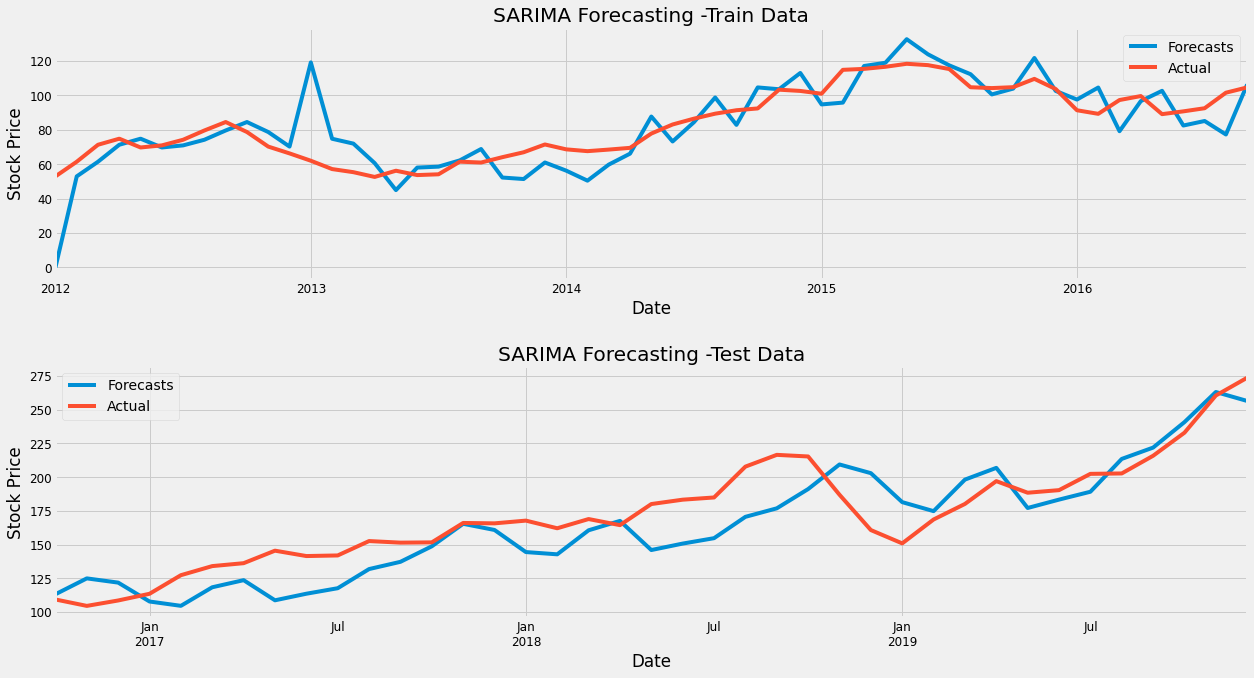

In [ ]:
fig,(ax1,ax2) = plt.subplots(2,figsize=(18,10))

forecasts_train.plot(label='Forecasts',ax=ax1,title='SARIMA Forecasting -Train Data')
train.plot(label='Actual',ax=ax1)
ax1.set_ylabel('Stock Price')

forecasts_test.plot(label='Forecasts',ax=ax2,title='SARIMA Forecasting -Test Data')
test.plot(label='Actual',ax=ax2)
ax2.set_ylabel('Stock Price')

ax1.legend()
ax2.legend()
plt.tight_layout(pad=2)

In [ ]:
print(result_metrics(train,forecasts_train,'SARIMA-Train Data'))
print('----')
print(result_metrics(test,forecasts_test,'SARIMA-Test Data'))


Result Metrics for SARIMA-Train Data
R2 Score :  0.491
Mean Squared Error :  199.567
Mean Absolute Error :  9.797
Mean Absolute Percentage Error 13.39
Accuracy(100-MAPE) of Model is 87.0%
None
----
Result Metrics for SARIMA-Test Data
R2 Score :  0.704
Mean Squared Error :  441.121
Mean Absolute Error :  17.557
Mean Absolute Percentage Error 10.65
Accuracy(100-MAPE) of Model is 89.0%
None


Training and Test Accuracy is equivalent .
Model Fit is good , no overfit or underfit.

In [ ]:
print(results.summary())

                                 Statespace Model Results                                 
Dep. Variable:                          Adj Close   No. Observations:                   57
Model:             SARIMAX(1, 1, 1)x(2, 2, 0, 12)   Log Likelihood                -120.570
Date:                            Fri, 21 Aug 2020   AIC                            251.139
Time:                                    18:17:51   BIC                            258.468
Sample:                                01-31-2012   HQIC                           253.569
                                     - 09-30-2016                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7677      0.439      1.748      0.081      -0.093       1.629
ma.L1         -0.5014      0.592   

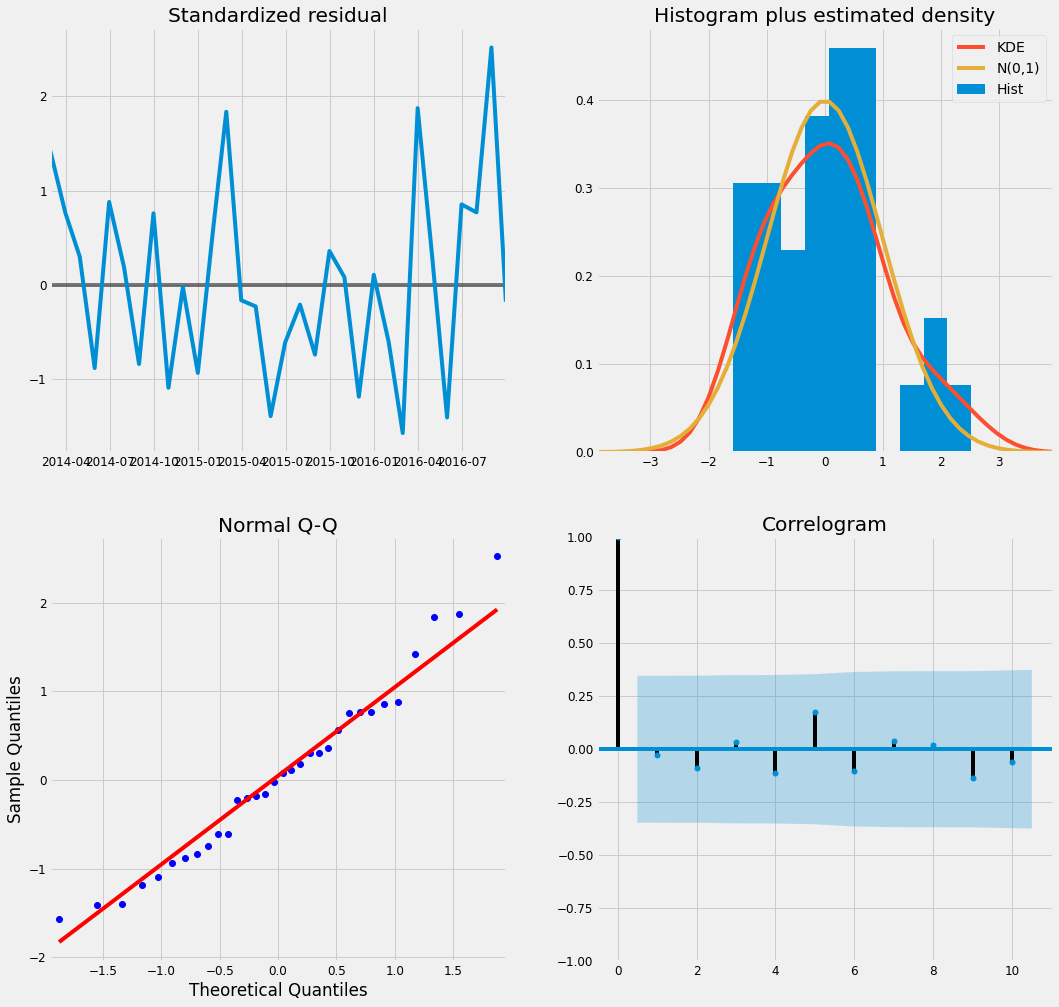

In [ ]:
##Checking Model Diagnotics on Training Data
results.plot_diagnostics(figsize=(16, 16))
plt.show()

Inference from Residual Analysis :-

->We observe that the residual plot kind of follows stationarity.

->The Distribution of Training Data residuals is showing almost Normal Distribution.

->The QQPlot points towards Normal Distribution

->Correlogram shows no relation -which indicates they are un-correlated.

Overall the model is captured the Stock Price in a good manner.

# Residual Analysis Test Data




In [ ]:
residuals_test = test-forecasts_test

No handles with labels found to put in legend.


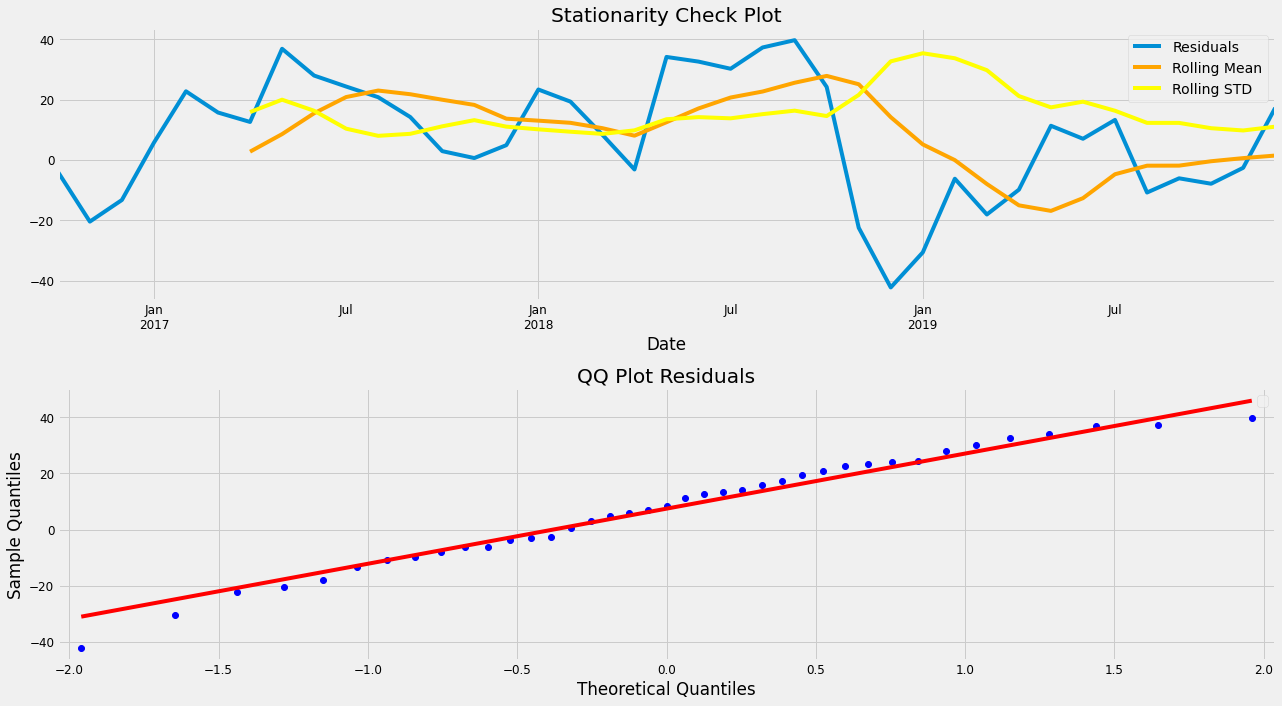

In [ ]:
fig,(ax1,ax2) = plt.subplots(2,figsize=(18,10))


residuals_test.plot(label='Residuals',ax=ax1,title='Stationarity Check Plot')
residuals_test.rolling(7).mean().plot(label='Rolling Mean',c='orange',ax=ax1)
residuals_test.rolling(7).std().plot(label='Rolling STD',c='yellow',ax=ax1)

qq_plot = qq(residuals_test,line='s',ax=ax2)
ax2.set_title('QQ Plot Residuals')
ax1.legend()
ax2.legend()
plt.tight_layout(pad=1)


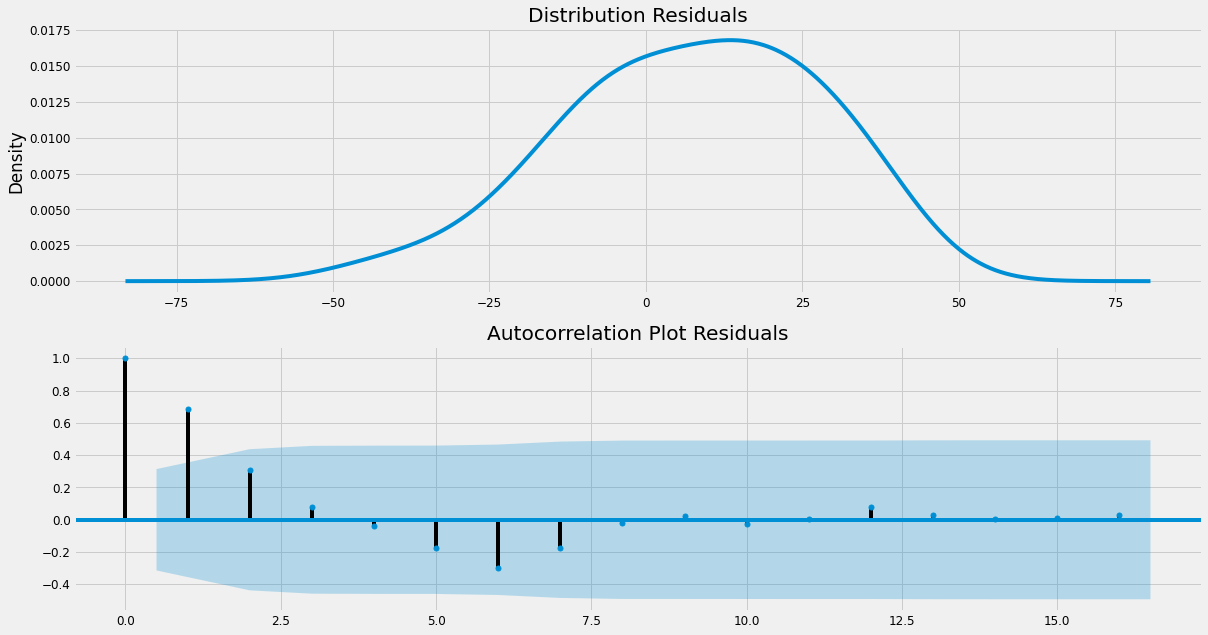

In [ ]:
fig,(ax1,ax2) = plt.subplots(2,figsize=(18,10))

residuals_test.plot(kind='kde',ax=ax1,title='Distribution Residuals')

acf = plot_acf(residuals_test,ax=ax2,title='Autocorrelation Plot Residuals')

In [ ]:
residuals_test.describe()

count    39.000000
mean      7.434401
std      19.899868
min     -42.220201
25%      -6.142017
50%       8.339802
75%      23.041383
max      39.683684
dtype: float64

In [ ]:
train_list = {}
test_list = {}
time_series_splits = TimeSeriesSplit(n_splits=4)
X = modelling_series.values

index = 1
for train_index, test_index in time_series_splits.split(X):
    train = X[train_index]
    test = X[test_index]
    train_list[index] = train
    test_list[index] = test
    index += 1

In [ ]:
modelling_series

Date
2012-01-31     52.907298
2012-02-29     61.424381
2012-03-31     71.292448
2012-04-30     74.810151
2012-05-31     69.708045
                 ...    
2019-08-31    202.738817
2019-09-30    215.853332
2019-10-31    232.974974
2019-11-30    260.569057
2019-12-31    273.780718
Freq: M, Name: Adj Close, Length: 96, dtype: float64

In [ ]:
train_list[1]

array([52.90729845, 61.42438085, 71.29244814, 74.8101506 , 69.70804455,
       70.92884829, 74.20094186, 79.59537835, 84.49984068, 78.69092705,
       70.22318162, 66.26465915, 62.00116614, 57.15554147, 55.34968775,
       52.58421514, 56.195146  , 53.66024345, 54.116633  , 61.4545905 ])

In [ ]:
def backtest_model(train,test):
    model = sm.tsa.SARIMAX(train,order=(1,1,1),seasonal_order=(2,2,0,12))
    results=model.fit()


    # train_get_dates_beginning = '2012-01-31'
    # train_get_dates_ending = str(modelling_series.index[len(train)].date())
    # test_get_dates_beginning = train_get_dates_ending
    # test_get_dates_ending = str(modelling_series.index[len(train)+len(test)].date())


    # forecasts_train = results.predict(start=train_get_dates_beginning,end=train_get_dates_ending)
    # forecasts_test = results.predict(start=test_get_dates_beginning,end=test_get_dates_ending)

    forecasts_train = results.predict(start=0,end=len(train))
    forecasts_test = results.predict(start=len(train),end=len(train)+len(test))


    fig,(ax1,ax2) = plt.subplots(2,figsize=(18,10))

    train = pd.DataFrame(train)
    test = pd.DataFrame(test)

    forecasts_train = pd.DataFrame(forecasts_train)
    forecasts_test = pd.DataFrame(forecasts_test)

    forecasts_train.plot(label='Forecasts',ax=ax1,title='SARIMA Forecasting -Train Data')
    train.plot(label='Actual',ax=ax1)
    ax1.set_ylabel('Stock Price')

    forecasts_test.plot(label='Forecasts',ax=ax2,title='SARIMA Forecasting -Test Data')
    test.plot(label='Actual',ax=ax2)
    ax2.set_ylabel('Stock Price')

    ax1.legend()
    ax2.legend()
    plt.tight_layout(pad=2)

,0
0,0.000000
1,52.907298
2,61.424381
3,71.292448
4,74.810151
5,69.708045
6,70.928848
7,74.200942
8,79.595378
9,84.499841


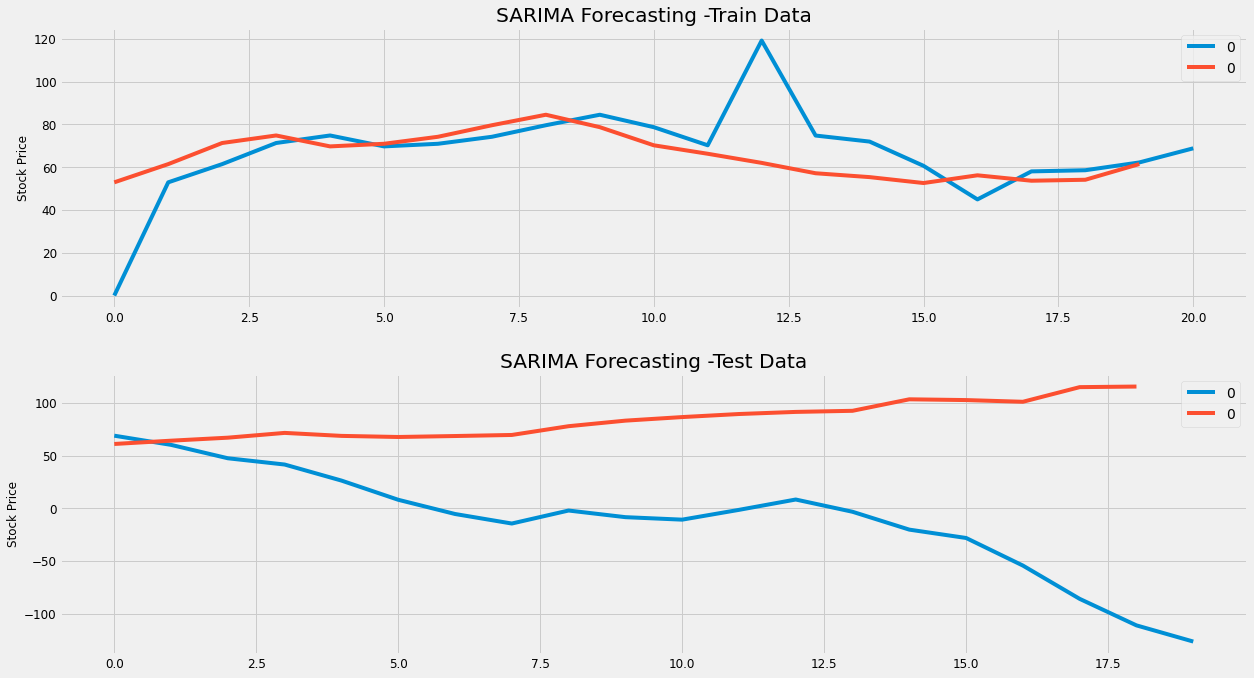

In [ ]:
## Backtest Set-1
backtest_model(train_list[1],test_list[1])

,0
0,0.000000
1,52.907825
2,61.424923
3,71.293026
4,74.810667
5,69.708389
6,70.929159
7,74.201265
8,79.595753
9,84.500262


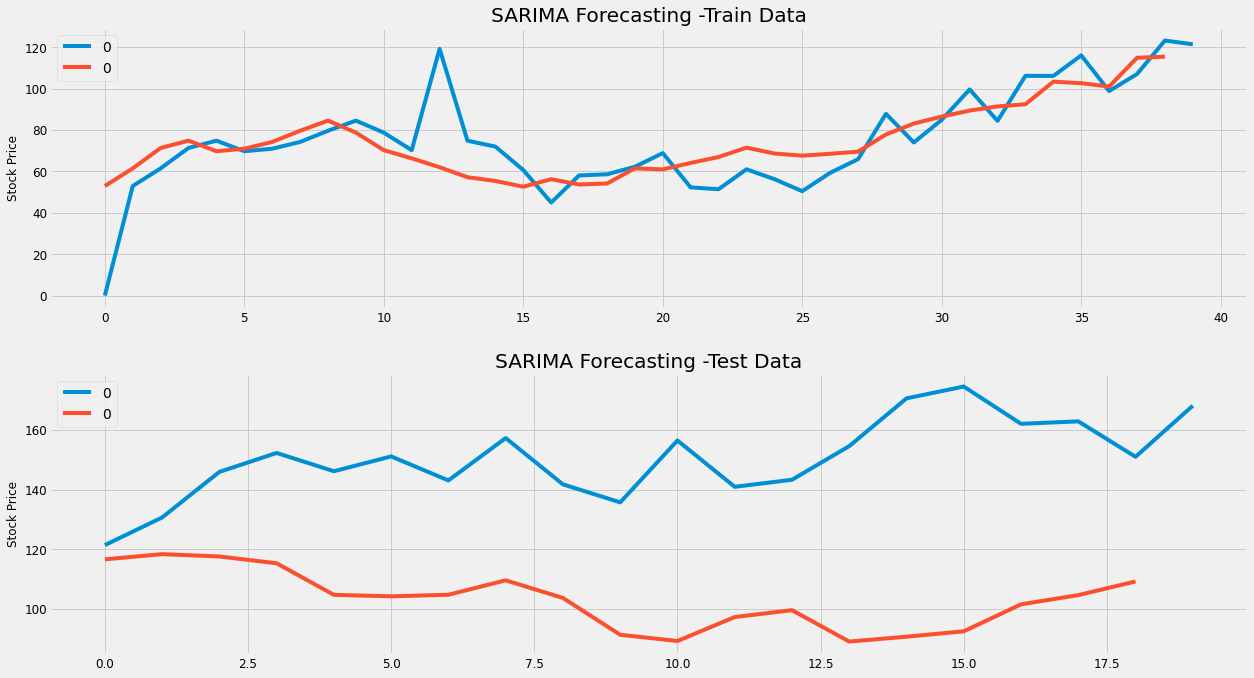

In [ ]:
backtest_model(train_list[2],test_list[2])

,0
0,0.000000
1,52.908078
2,61.425135
3,71.293207
4,74.810764
5,69.708351
6,70.929056
7,74.201106
8,79.595535
9,84.499949


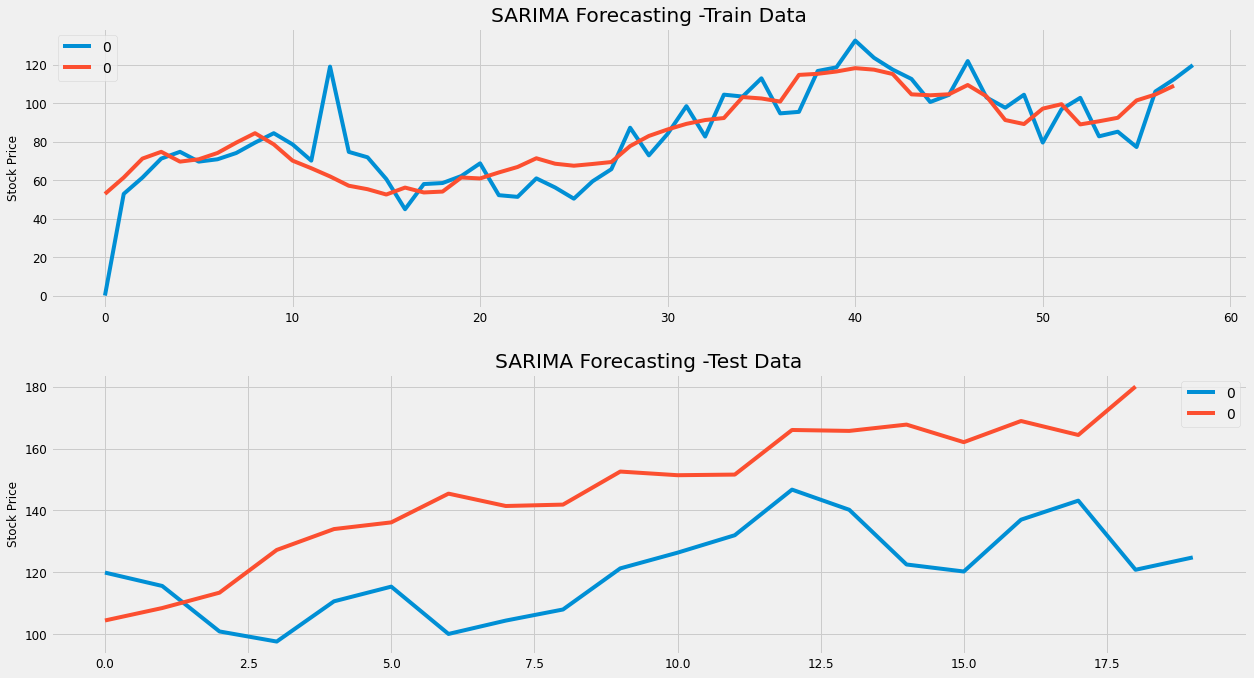

In [ ]:
backtest_model(train_list[3],test_list[3])

In [ ]:
forecasts_train

,0
0,68.811285


In [ ]:
fig,(ax1,ax2) = plt.subplots(2,figsize=(18,10))

forecasts_train.plot(label='Forecasts',ax=ax1,title='SARIMA Forecasting -Train Data')
train.plot(label='Actual',ax=ax1)
ax1.set_ylabel('Stock Price')

forecasts_test.plot(label='Forecasts',ax=ax2,title='SARIMA Forecasting -Test Data')
test.plot(label='Actual',ax=ax2)
ax2.set_ylabel('Stock Price')

ax1.legend()
ax2.legend()
plt.tight_layout(pad=2)

**Seasonal ARIMA-Verdict**

The mean value is close to zero but it suggests that there is some bias in the model.
Overall the model has performed good for a problem like Stock Price Prediction being a difficult problem .



# **Facebook's Prophet Model for Time Series**

In [ ]:
##Getting Data Ready for the Model
prophet_data = monthly_data
prophet_data['Date'] = prophet_data.index
prophet_data

,Adj Close,Year,Month,dayofweek,quarter,Date
Date,,,,,,
2012-01-31,52.907298,2012,January,Tuesday,1,2012-01-31
2012-02-29,61.424381,2012,February,Wednesday,1,2012-02-29
2012-03-31,71.292448,2012,March,Saturday,1,2012-03-31
2012-04-30,74.810151,2012,April,Monday,2,2012-04-30
2012-05-31,69.708045,2012,May,Thursday,2,2012-05-31
...,...,...,...,...,...,...
2019-08-31,202.738817,2019,August,Saturday,3,2019-08-31
2019-09-30,215.853332,2019,September,Monday,3,2019-09-30
2019-10-31,232.974974,2019,October,Thursday,4,2019-10-31


In [ ]:
prophet_data.drop(labels=['Year','Month'],axis=1,inplace=True)

In [ ]:
prophet_data = prophet_data.reindex(columns=['Date','Adj Close'])

In [ ]:
##Prophet needs two columns in form of ds and y being Date and series
prophet_data.rename(columns={'Date':'ds',
                   'Adj Close':'y'},inplace=True)

In [ ]:
prophet_data

,ds,y
Date,,
2012-01-31,2012-01-31,52.907298
2012-02-29,2012-02-29,61.424381
2012-03-31,2012-03-31,71.292448
2012-04-30,2012-04-30,74.810151
2012-05-31,2012-05-31,69.708045
...,...,...
2019-08-31,2019-08-31,202.738817
2019-09-30,2019-09-30,215.853332
2019-10-31,2019-10-31,232.974974


In [ ]:
##Spliting Train Test 
prophet_train,prophet_test = split(prophet_data,train_size=0.6,shuffle=False)
print('Training Data Size :',len(prophet_train))
print('Testing Data Size :',len(prophet_test))

Training Data Size : 57
Testing Data Size : 39


In [ ]:
##Model Fitting Basic Model
prophet_model = Prophet(yearly_seasonality=True)
prophet_model.fit(prophet_train)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future= prophet_model.make_future_dataframe(periods=39,freq='M')

In [ ]:
future

,ds
0,2012-01-31
1,2012-02-29
2,2012-03-31
3,2012-04-30
4,2012-05-31
...,...
91,2019-08-31
92,2019-09-30
93,2019-10-31
94,2019-11-30


Forecasting Prophet-Basic Model

In [ ]:
##Predicting Using Prophet
forecast=prophet_model.predict(future)
forecast.index = prophet_data['y'].index


In [ ]:
prophet_df = pd.concat([forecast['yhat'],prophet_data['y']],axis=1,ignore_index=True)
prophet_df.columns = ['Predicted','Actual']
prophet_df

,Predicted,Actual
Date,,
2012-01-31,51.013627,52.907298
2012-02-29,54.127696,61.424381
2012-03-31,62.093561,71.292448
2012-04-30,64.484456,74.810151
2012-05-31,59.239299,69.708045
...,...,...
2019-08-31,137.032166,202.738817
2019-09-30,138.633809,215.853332
2019-10-31,141.063501,232.974974


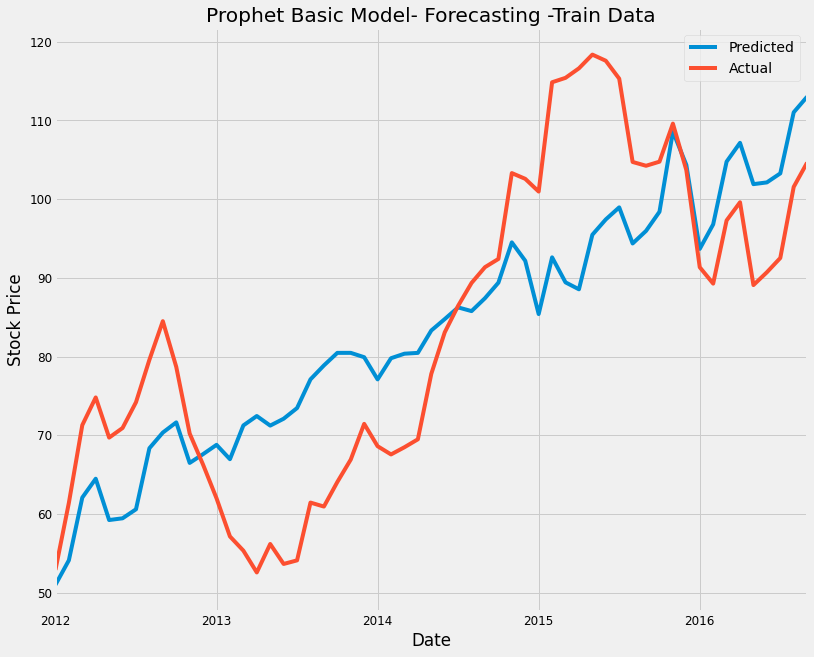

In [ ]:
fig = plt.figure(figsize=(12,10))
prophet_df['Predicted'][:57].plot(label='Predicted')
prophet_df['Actual'][:57].plot(label='Actual')
plt.title('Prophet Basic Model- Forecasting -Train Data')
plt.ylabel('Stock Price')
plt.legend()

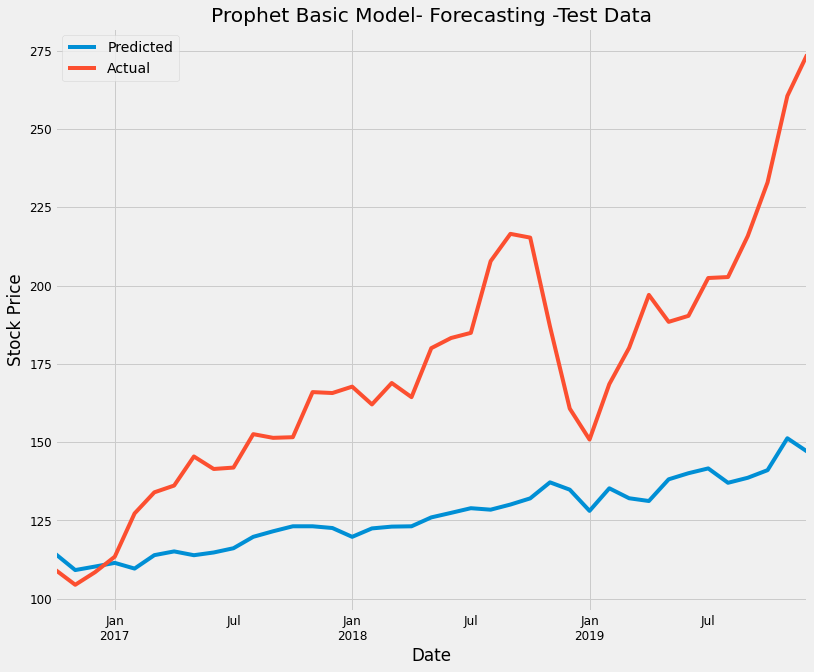

In [ ]:
fig = plt.figure(figsize=(12,10))
prophet_df['Predicted'][57:].plot(label='Predicted')
prophet_df['Actual'][57:].plot(label='Actual')
plt.title('Prophet Basic Model- Forecasting -Test Data')
plt.ylabel('Stock Price')
plt.legend()

In [ ]:
print(result_metrics(prophet_df['Actual'][:57],prophet_df['Predicted'][:57],'Prophet Basic-Train Data'))

Result Metrics for Prophet Basic-Train Data
R2 Score :  0.598
Mean Squared Error :  157.648
Mean Absolute Error :  10.794
Mean Absolute Percentage Error 13.785
Accuracy(100-MAPE) of Model is 86.0%
None


In [ ]:
print(result_metrics(prophet_df['Actual'][57:],prophet_df['Predicted'][57:],'Prophet Basic-Test Data'))

Result Metrics for Prophet Basic-Test Data
R2 Score :  -0.973
Mean Squared Error :  2936.426
Mean Absolute Error :  46.175
Mean Absolute Percentage Error 24.535
Accuracy(100-MAPE) of Model is 75.0%
None


The Basic Prophet Model with default parameters overfits into the model as represented by the Train Test Accuracy differences.

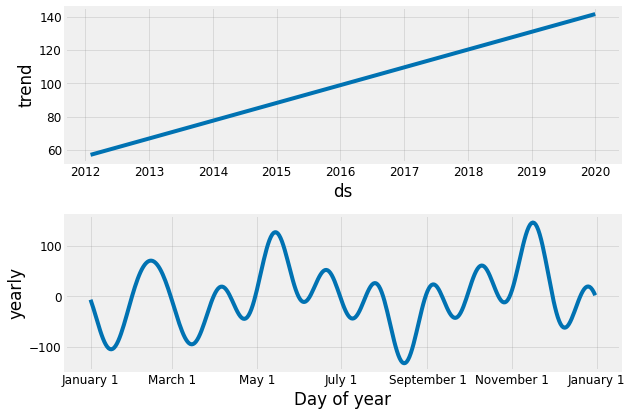

In [ ]:
fig = prophet_model.plot_components(forecast)

In [ ]:
print('Head',prophet_test.head(1))
print('Tail',prophet_test.tail(1))

Head                    ds           y
Date                             
2016-10-31 2016-10-31  109.212791
Tail                    ds           y
Date                             
2019-12-31 2019-12-31  273.780718


Seasonal-ARIMA seems to have captured the model in a better way.


**Hyper-Tuning for Prophet Model**

In [ ]:
from sklearn.model_selection import ParameterGrid
params_grid = {'seasonality_mode':('multiplicative','additive'),
               'changepoint_prior_scale':[0.3,0.4],
              'holidays_prior_scale':[0.3,0.4],
              'n_changepoints' : [20,50]}
grid = ParameterGrid(params_grid)
cnt = 0
for p in grid:
    cnt = cnt+1

print('Total Possible Models',cnt)

Total Possible Models 16


In [ ]:
df = prophet_data 

In [ ]:
prophet_train_hyper,prophet_test_hyper = split(prophet_data,train_size=0.7,shuffle=False)

In [ ]:
prophet_test_hyper.head(5)

,ds,y
Date,,
2017-08-31,2017-08-31,152.563906
2017-09-30,2017-09-30,151.386422
2017-10-31,2017-10-31,151.586949
2017-11-30,2017-11-30,165.996497
2017-12-31,2017-12-31,165.699087


In [ ]:
len(prophet_test_hyper)

29

In [ ]:
strt='2017-08-31'
end='2019-12-31'
model_parameters = pd.DataFrame(columns = ['MAPE','Parameters'])
for i in grid:
    test = pd.DataFrame()
    print(i)
    
    train_model =Prophet(changepoint_prior_scale = i['changepoint_prior_scale'],
                         holidays_prior_scale = i['holidays_prior_scale'],
                         n_changepoints = i['n_changepoints'],
                         seasonality_mode = i['seasonality_mode'],
                         weekly_seasonality=False,
                         daily_seasonality = False,
                         yearly_seasonality = True,
                         )
    
    train_model.fit(prophet_train_hyper)
    train_forecast = train_model.make_future_dataframe(periods=29, freq='M',include_history = False)
    train_forecast = train_model.predict(train_forecast)
    test=train_forecast[['ds','yhat']]
    Actual = df[(df['ds']>=strt) & (df['ds']<=end)]
    MAPE = mean_absolute_percentage_error(Actual['y'],abs(test['yhat']))
    print('Mean Absolute Percentage Error(MAPE)---------------------------------------------------------',MAPE)
    model_parameters = model_parameters.append({'MAPE':MAPE,'Parameters':p},ignore_index=True)

{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 20, 'seasonality_mode': 'multiplicative'}
Mean Absolute Percentage Error(MAPE)--------------------------------------------------------- 12.859205296067646
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 20, 'seasonality_mode': 'additive'}
Mean Absolute Percentage Error(MAPE)--------------------------------------------------------- 12.319035627345643
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative'}
Mean Absolute Percentage Error(MAPE)--------------------------------------------------------- 12.949163539500603
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 50, 'seasonality_mode': 'additive'}
Mean Absolute Percentage Error(MAPE)--------------------------------------------------------- 12.612467608177305
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.4, 'n_changep

In [ ]:
parameters = model_parameters.sort_values(by=['MAPE'])
parameters = parameters.reset_index(drop=True)
parameters.head(3)

,MAPE,Parameters
0,12.319036,"{'changepoint_prior_scale': 0.4, 'holidays_pri..."
1,12.319036,"{'changepoint_prior_scale': 0.4, 'holidays_pri..."
2,12.592062,"{'changepoint_prior_scale': 0.4, 'holidays_pri..."


In [ ]:
parameters['Parameters'][0]

{'changepoint_prior_scale': 0.4,
 'holidays_prior_scale': 0.4,
 'n_changepoints': 50,
 'seasonality_mode': 'additive'}

Problem with Prophet is its Overfits quite easily for out dataset.
Therefore we try some other hyperparamters with Hit and Trial

In [ ]:
prophet_tuned_model = Prophet(
                      growth='linear',
                      changepoint_prior_scale= 0.001,
                      holidays_prior_scale = 0.02,
                      seasonality_prior_scale=0.3,
                      
                      seasonality_mode = 'additive',
                      weekly_seasonality=False,
                      daily_seasonality = False,
                      yearly_seasonality = True,
                      changepoints=['2017-07-31']
                      )
prophet_tuned_model.add_country_holidays(country_name='US')
prophet_tuned_model.add_seasonality(name='monthly', period=30.5, fourier_order=5, prior_scale=0.02)
prophet_tuned_model.add_seasonality(name='yearly', period=365, fourier_order=20)
prophet_tuned_model.add_country_holidays(country_name='US')
prophet_tuned_model.fit(prophet_train_hyper)

In [ ]:
future_hyper= prophet_tuned_model.make_future_dataframe(periods=29,freq='M')

In [ ]:
future_hyper=prophet_tuned_model.predict(future_hyper)

In [ ]:
future_hyper.index = prophet_data['y'].index

In [ ]:
prophet_hyper_df = pd.concat([future_hyper['yhat'],prophet_data['y']],axis=1,ignore_index=True)

In [ ]:
prophet_hyper_df.columns = ['Predicted','Actual']
prophet_hyper_df.tail(3)

,Predicted,Actual
Date,,
2019-10-31,162.409937,232.974974
2019-11-30,163.999990,260.569057
2019-12-31,165.712779,273.780718


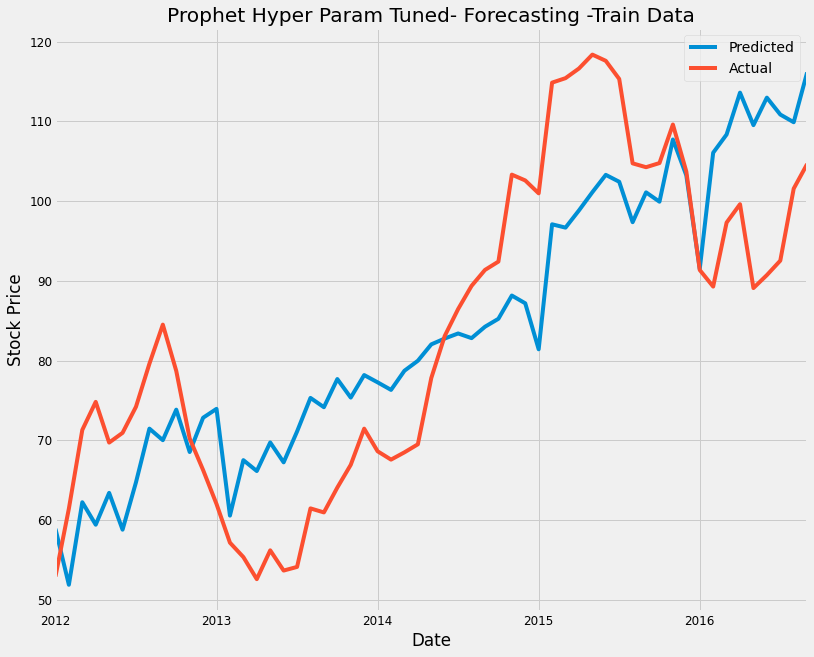

In [ ]:
fig = plt.figure(figsize=(12,10))
prophet_hyper_df['Predicted'][:57].plot(label='Predicted')
prophet_hyper_df['Actual'][:57].plot(label='Actual')
plt.title('Prophet Hyper Param Tuned- Forecasting -Train Data')
plt.ylabel('Stock Price')
plt.legend()

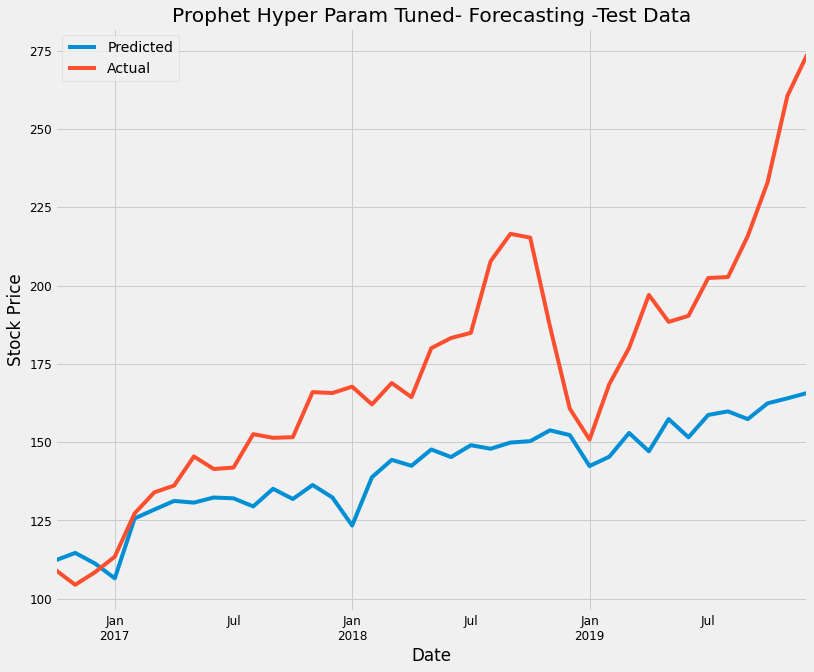

In [ ]:
fig = plt.figure(figsize=(12,10))
prophet_hyper_df['Predicted'][57:].plot(label='Predicted')
prophet_hyper_df['Actual'][57:].plot(label='Actual')
plt.title('Prophet Hyper Param Tuned- Forecasting -Test Data')
plt.ylabel('Stock Price')
plt.legend()

In [ ]:
result_metrics(prophet_hyper_df['Actual'][:67],prophet_hyper_df['Predicted'][:67],'Hyper-Tuned Prophet Train Data')

Result Metrics for Hyper-Tuned Prophet Train Data
R2 Score :  0.784
Mean Squared Error :  129.543
Mean Absolute Error :  9.986
Mean Absolute Percentage Error 12.076
Accuracy(100-MAPE) of Model is 88.0%


In [ ]:
result_metrics(prophet_hyper_df['Actual'][67:],prophet_hyper_df['Predicted'][67:],'Hyper-Tuned Prophet Test Data')

Result Metrics for Hyper-Tuned Prophet Test Data
R2 Score :  -1.31
Mean Squared Error :  2187.789
Mean Absolute Error :  40.501
Mean Absolute Percentage Error 20.338
Accuracy(100-MAPE) of Model is 80.0%


After Hyper-parameter tuning the model is not able to capture the seasonality and sudden jump in time series in the Year 2017 onwards.

->Prophet is easily overfitted.

->Seasonal ARIMA is superior to Prophet

->Prophet is good at capturing the trend.

->By creating Extra Regressors we can maybe improve the Results in future projects.




**Project Summary**

Seasonal ARIMA Vs Facebook's Prophet

->Advantages of Prophet includes very easy to implement, fast , and less statistical know-how model . In Seasonal ARIMA we had to follow lot of tests and process to generate predictions.

->Seasonal ARIMA is better at capturing the seasonality part .

->Prophet has a overfitting problem .

->Overall Both models are robust .

->Prophet is better at dealing with outliers.

->We have found Seasonal ARIMA is much better our at prediction problem.
More confidence when predicting with Seasonal-ARIMA since its backed by Mathematical and Statistical tests.

->Accuracy of SARIMA is 89% and 80% for Prophet(Both on Out of Sample Data)




# Actionable Insight 
Observing the Trend given by Both Models.

**AAPL IS A BUY.**